In [1]:
import pandas as pd 
import numpy as np
import os

In [2]:
os.getcwd()
os.chdir('./train_dataset')

In [6]:
# open csv
def read_csv(path):
    df = pd.read_csv(path)
    return df

Correlation between variables

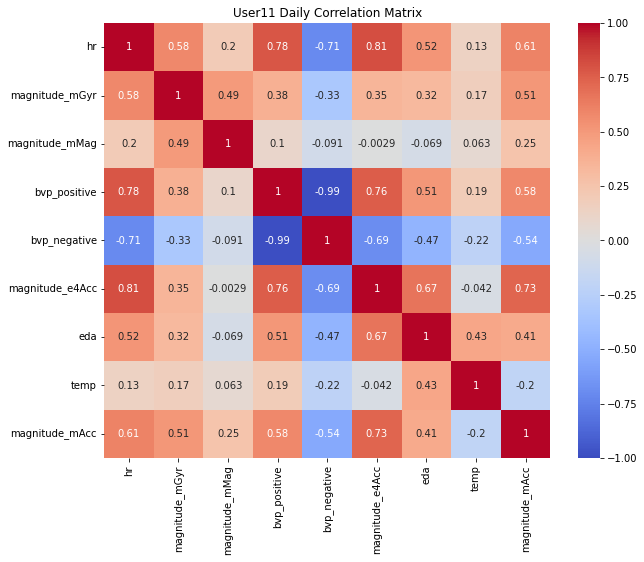

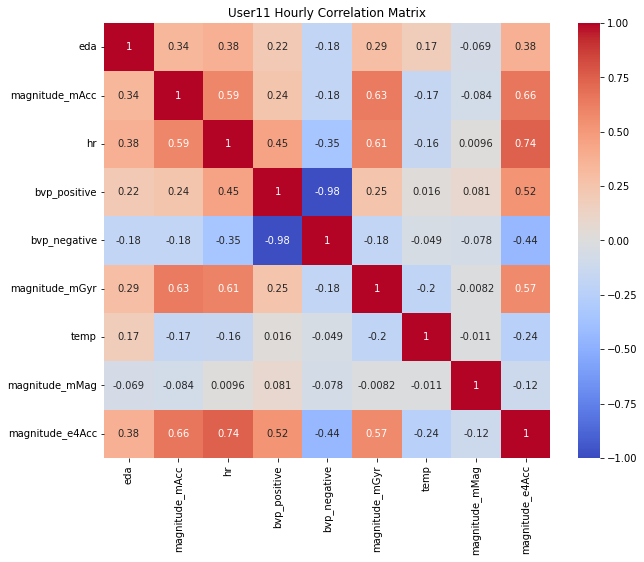

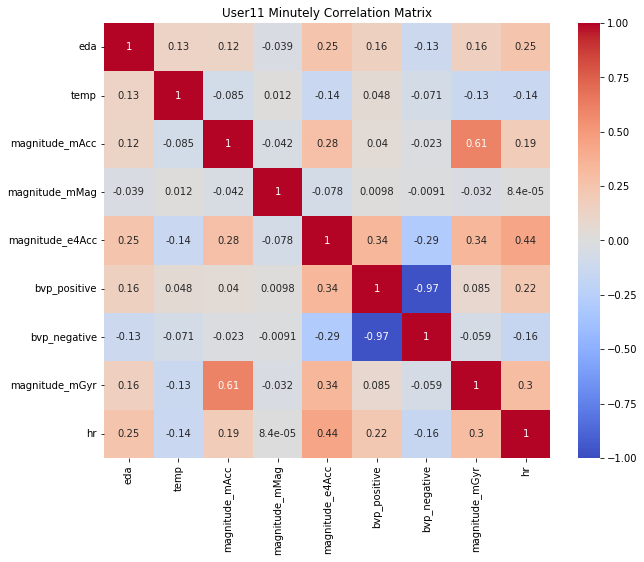

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def read_and_process_csv(filepath):
    df = pd.read_csv(filepath)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.drop(columns=['index', 'timestamp', 'Unnamed: 0', 'lat', 'lon', 'accuracy'], inplace=True, errors='ignore')
    df.dropna(axis=1, how='all', inplace=True)
    return df

# File paths
filepaths = [
    "./sensor_data/daily/user06_daily.csv",
    "./sensor_data/hourly/user06_hourly.csv",
    "./sensor_data/minutely/user06_minutely.csv"
]

# Process datasets
df_list = [read_and_process_csv(filepath) for filepath in filepaths]

# Generate correlation matrices
corr_matrices = [df.corr() for df in df_list]

# Plot correlation matrices
titles = ['User11 Daily Correlation Matrix', 'User11 Hourly Correlation Matrix', 'User11 Minutely Correlation Matrix']

for i, (corr_matrix, title) in enumerate(zip(corr_matrices, titles)):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()



Demographic sleeps tats

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('./user_survey_2020.csv')

groups = df.groupby(['userId', 'date'])

# Define a function to merge rows based on the specified condition
def merge_rows(group):
    if pd.isnull(group.iloc[0]).any():
        return group.iloc[0].combine_first(group.iloc[1])
    else:
        return group.iloc[0]


transformed_df = groups.apply(merge_rows)
transformed_df.reset_index(drop=True, inplace=True)
#transformed_df.to_csv('./user_survey_2020_transformed.csv', index=False)


/tmp/ipykernel_713454/1754238872.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transformed_df = groups.apply(merge_rows)


In [4]:
demo = pd.read_csv("./user_info_2020.csv")
sleep = pd.read_csv("./user_sleep_2020.csv")
survey_demo = pd.merge(transformed_df, demo, how='left', on='userId')
survey_demo

userId        date amPm        startInput          endInput  sleep  \
0    user01  2020-08-30   am  2020-08-30 12:59  2020-08-30 13:00    5.0   
1    user01  2020-08-31   am   2020-08-31 8:43   2020-08-31 8:43    3.0   
2    user01  2020-09-01   am  2020-09-01 10:17  2020-09-01 10:18    2.0   
3    user01  2020-09-02   am  2020-09-02 10:35  2020-09-02 10:35    2.0   
4    user01  2020-09-03   am  2020-09-03 11:04  2020-09-03 11:04    3.0   
..      ...         ...  ...               ...               ...    ...   
610  user30  2020-09-23   am   2020-09-23 8:07   2020-09-23 8:07    3.0   
611  user30  2020-09-24   am   2020-09-24 8:06   2020-09-24 8:06    3.0   
612  user30  2020-09-25   am   2020-09-25 8:03   2020-09-25 8:03    4.0   
613  user30  2020-09-26   am   2020-09-26 9:37   2020-09-26 9:38    3.0   
614  user30  2020-09-27   am   2020-09-27 9:27   2020-09-27 9:28    3.0   

     sleepProblem  dream  amCondition  amEmotion  ...  cAmount(ml)  \
0             4.0    2.0          2.0        3.0  ...          NaN   
1             6.0    2.0          3.0        3.0  ...        250.0   
2             3.0    2.0          2.0        3.0  ...       1000.0   
3             3.0    4.0          2.0        3.0  ...        500.0   
4             3.0    2.0          2.0        3.0  ...       1000.0   
..            ...    ...          ...        ...  ...          ...   
610           0.0    4.0          2.0        3.0  ...          NaN   
611           0.0    4.0          3.0        2.0  ...          NaN   
612           0.0    4.0          2.0        2.0  ...          NaN   
613           0.0    4.0          3.0        3.0  ...          NaN   
614           0.0    4.0          3.0        3.0  ...          NaN   

           alcohol  aAmount(ml) gender  age handed  height weight     startDt  \
0              NaN          NaN      M   27   Left     167     76  2020-08-30   
1              NaN          NaN      M   27   Left     167     76  2020-08-30   
2              NaN          NaN      M   27   Left     167     76  2020-08-30   
3              NaN          NaN      M   27   Left     167     76  2020-08-30   
4    not specified       1000.0      M   27   Left     167     76  2020-08-30   
..             ...          ...    ...  ...    ...     ...    ...         ...   
610            NaN          NaN      M   26  Right     174     58  2020-08-31   
611            NaN          NaN      M   26  Right     174     58  2020-08-31   
612            NaN          NaN      M   26  Right     174     58  2020-08-31   
613            NaN          NaN      M   26  Right     174     58  2020-08-31   
614            NaN          NaN      M   26  Right     174     58  2020-08-31   

          endDt  
0    2020-09-27  
1    2020-09-27  
2    2020-09-27  
3    2020-09-27  
4    2020-09-27  
..          ...  
610  2020-09-27  
611  2020-09-27  
612  2020-09-27  
613  2020-09-27  
614  2020-09-27  

[615 rows x 24 columns]

In [5]:
survey_demo_sleep = pd.merge(survey_demo, sleep, on=['userId', 'date'])
survey_demo_sleep.columns

Index(['userId', 'date', 'amPm', 'startInput', 'endInput', 'sleep',
       'sleepProblem', 'dream', 'amCondition', 'amEmotion', 'pmEmotion',
       'pmStress', 'pmFatigue', 'caffeine', 'cAmount(ml)', 'alcohol',
       'aAmount(ml)', 'gender', 'age', 'handed', 'height', 'weight',
       'startDt_x', 'endDt_x', 'timezone', 'startDt_y', 'endDt_y',
       'lastUpdate', 'wakeupduration', 'lightsleepduration',
       'deepsleepduration', 'wakeupcount', 'durationtosleep',
       'remsleepduration', 'durationtowakeup', 'hr_average', 'hr_min',
       'hr_max', 'rr_average', 'rr_min', 'rr_max',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount',
       'sleep_score'],
      dtype='object')

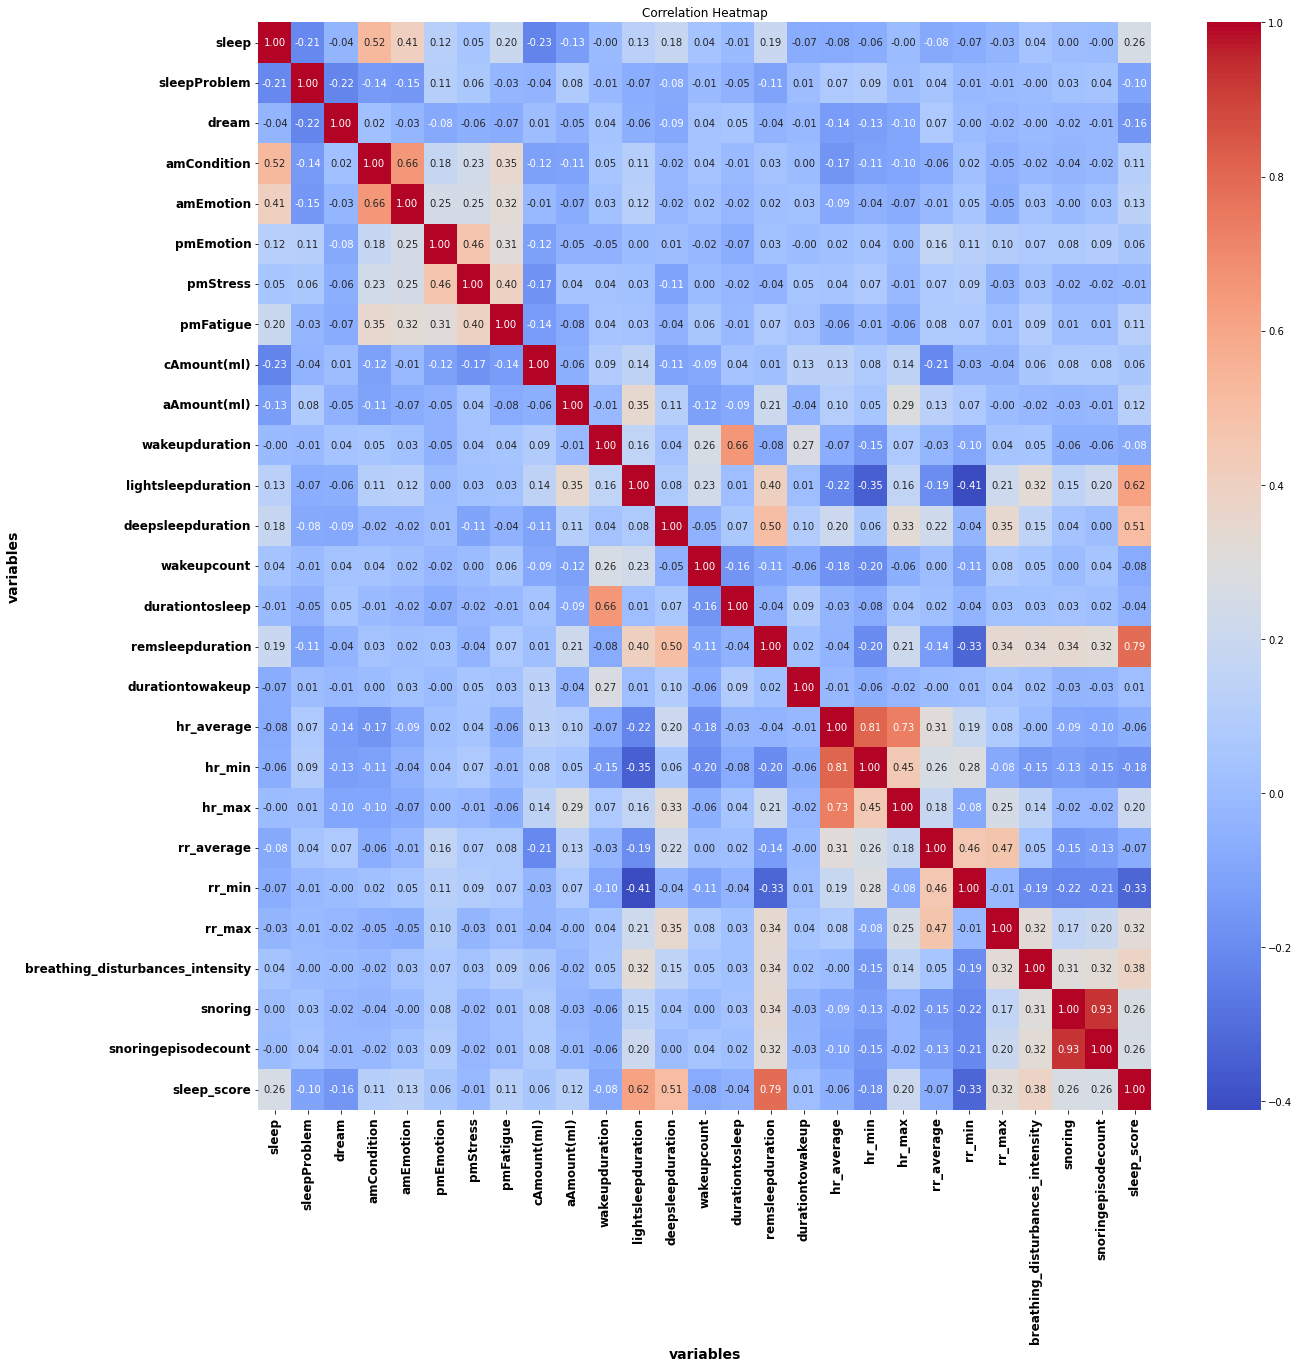

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_for_heatmap = survey_demo_sleep.drop(columns={'lastUpdate', 'startInput', 'endInput', 'gender', 'age', 'handed', 'height', 'weight', 'startDt_x', 'endDt_x', 'startDt_y', 'endDt_y'})
numeric_df = merged_for_heatmap.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.xlabel('variables', fontsize=14, fontweight='bold')
plt.ylabel('variables', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()

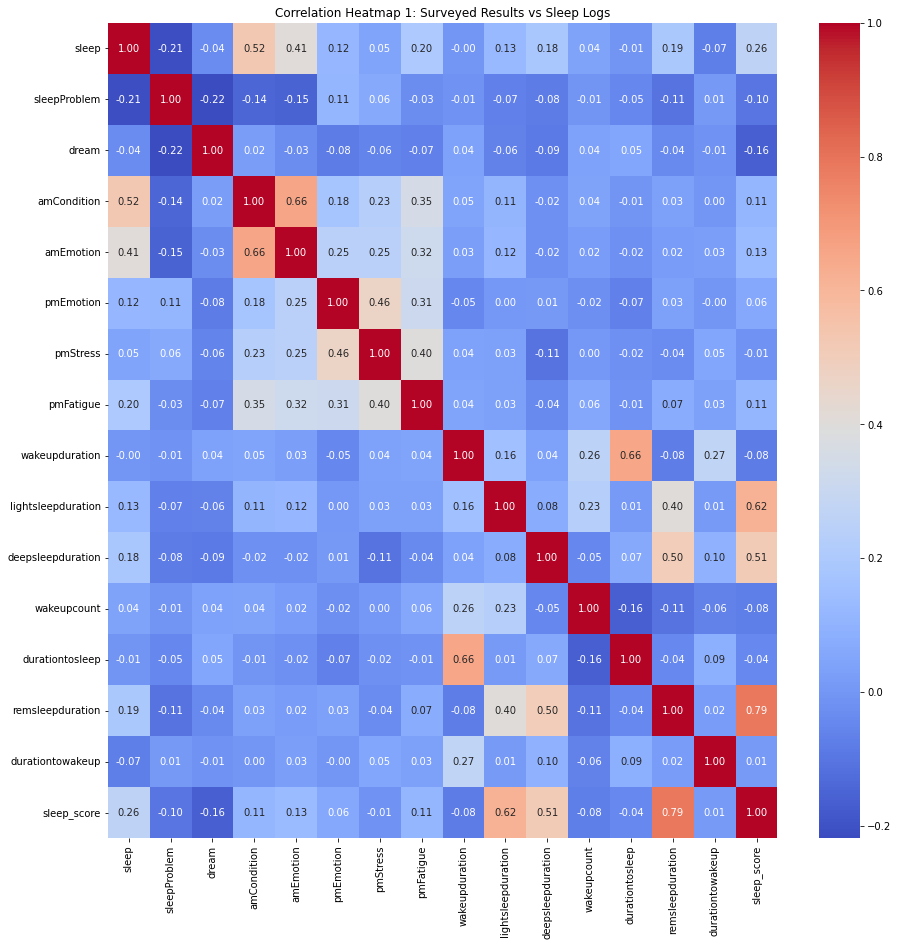

In [51]:
# correlation of surveyed results and sleep score
for_heatmap1 = survey_demo_sleep[['sleep', 'sleepProblem', 'dream', 'amCondition', 'amEmotion', 'pmEmotion', 'pmStress', 'pmFatigue', 'wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount', 'durationtosleep', 'remsleepduration', 'durationtowakeup', 'sleep_score']]
for_heatmap1_numeric = for_heatmap1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = for_heatmap1_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap 1: Surveyed Results vs Sleep Logs')
plt.show()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Stack the correlation pairs into a DataFrame and sort by correlation coefficient
correlation_pairs = upper_triangle.unstack().sort_values(ascending=False)

# Filter out pairs with correlation coefficient >= 0.5 (you can adjust this threshold)
high_correlation_pairs = correlation_pairs[abs(correlation_pairs) >= 0.5]

# Display the pairs with high correlation in a table
high_correlation_table = pd.DataFrame(high_correlation_pairs, columns=['Correlation'])
#print(high_correlation_table)
all_correlation_table = pd.DataFrame(correlation_pairs, columns=['Correlation'])
all_correlation_table.to_csv("heatmap1_corr.csv")

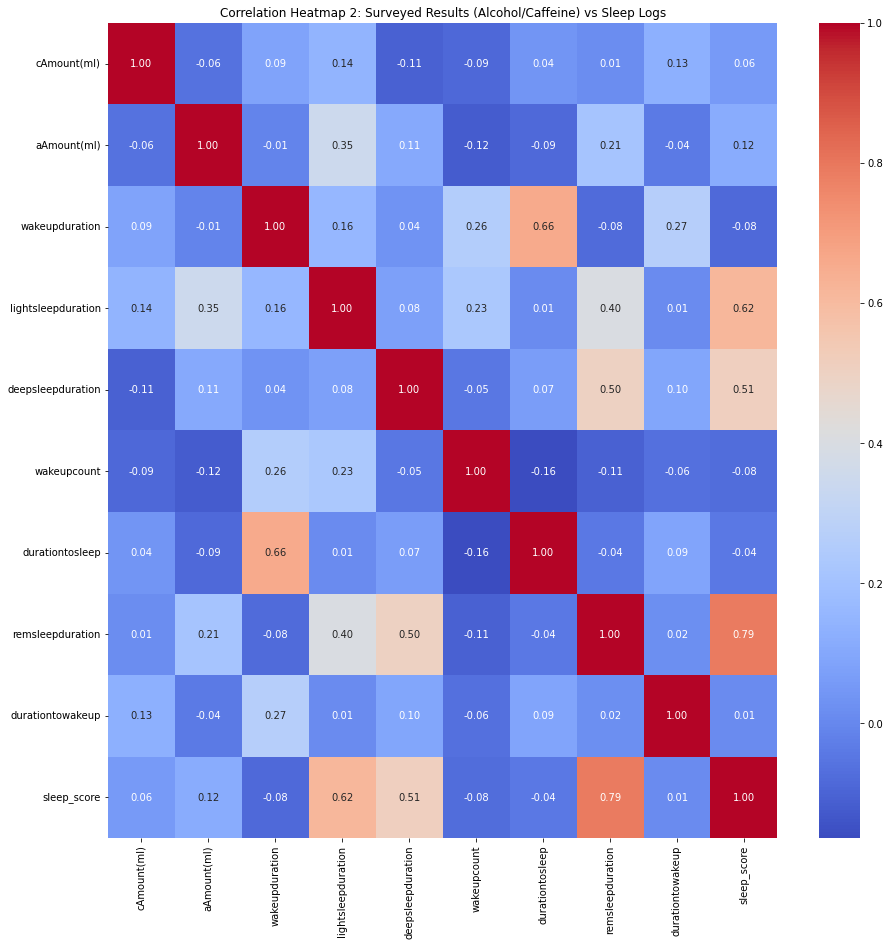

In [52]:
# correlation of surveyed results and sleep score
for_heatmap2 = survey_demo_sleep[['caffeine', 'cAmount(ml)', 'alcohol', 'aAmount(ml)', 'wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount', 'durationtosleep', 'remsleepduration', 'durationtowakeup', 'sleep_score']]
for_heatmap2_numeric = for_heatmap2.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = for_heatmap2_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap 2: Surveyed Results (Alcohol/Caffeine) vs Sleep Logs')
plt.show()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Stack the correlation pairs into a DataFrame and sort by correlation coefficient
correlation_pairs = upper_triangle.unstack().sort_values(ascending=False)

# Filter out pairs with correlation coefficient >= 0.5 (you can adjust this threshold)
high_correlation_pairs = correlation_pairs[abs(correlation_pairs) >= 0.5]

# Display the pairs with high correlation in a table
high_correlation_table = pd.DataFrame(high_correlation_pairs, columns=['Correlation'])
#print(high_correlation_table)

all_correlation_table = pd.DataFrame(correlation_pairs, columns=['Correlation'])
all_correlation_table.to_csv("heatmap2_corr.csv")

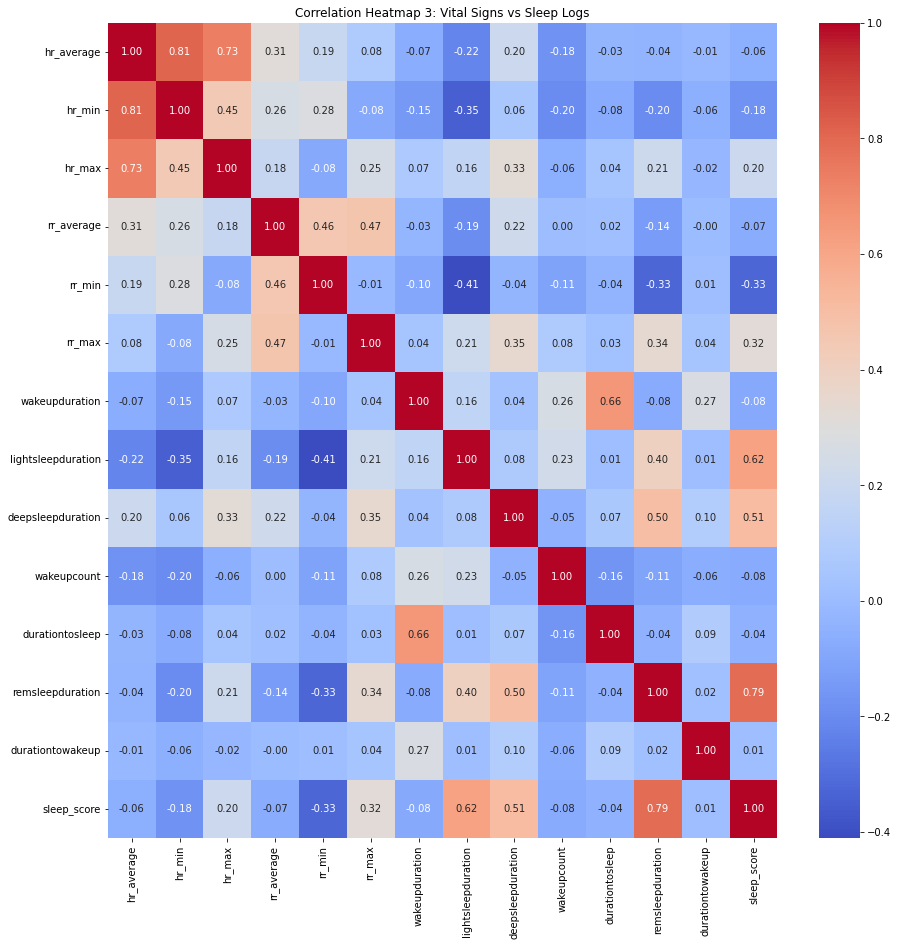

In [53]:
# correlation of surveyed results and sleep score
for_heatmap3 = survey_demo_sleep[['hr_average', 'hr_min', 'hr_max', 'rr_average', 'rr_min', 'rr_max', 'wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount', 'durationtosleep', 'remsleepduration', 'durationtowakeup', 'sleep_score']]
for_heatmap3_numeric = for_heatmap3.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = for_heatmap3_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap 3: Vital Signs vs Sleep Logs')
plt.show()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Stack the correlation pairs into a DataFrame and sort by correlation coefficient
correlation_pairs = upper_triangle.unstack().sort_values(ascending=False)

# Filter out pairs with correlation coefficient >= 0.5 (you can adjust this threshold)
high_correlation_pairs = correlation_pairs[abs(correlation_pairs) >= 0.1]

# Display the pairs with high correlation in a table
high_correlation_table = pd.DataFrame(high_correlation_pairs, columns=['Correlation'])
#print(high_correlation_table)

all_correlation_table = pd.DataFrame(correlation_pairs, columns=['Correlation'])
all_correlation_table.to_csv("heatmap3_corr.csv")

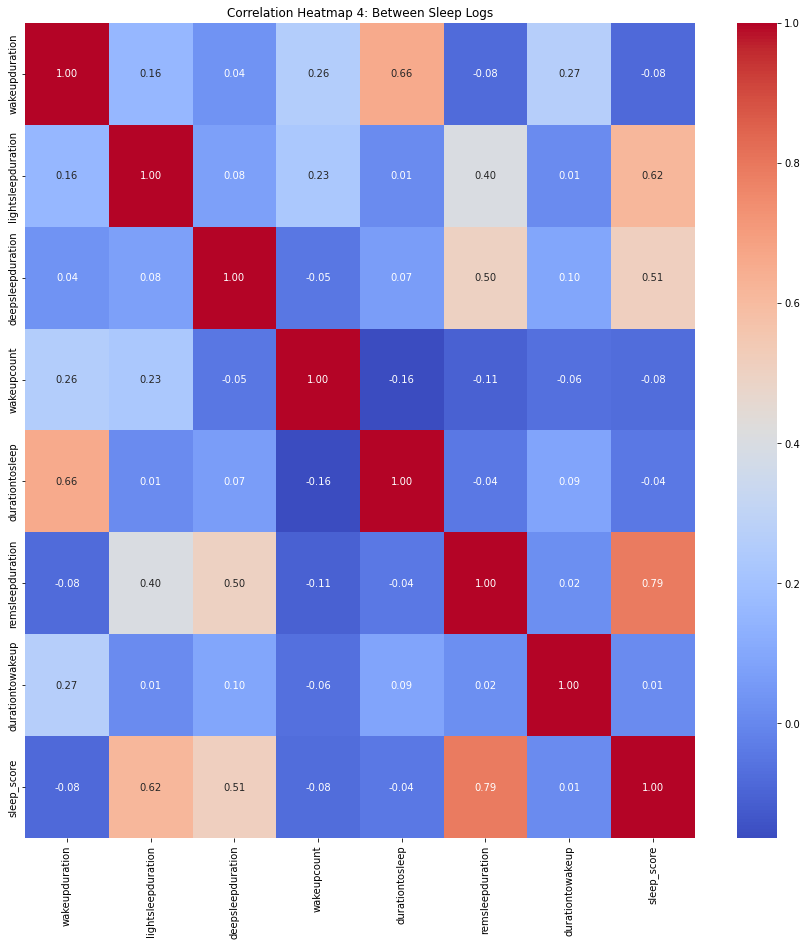

In [55]:
# correlation of surveyed results and sleep score
for_heatmap4 = survey_demo_sleep[['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount', 'durationtosleep', 'remsleepduration', 'durationtowakeup', 'sleep_score']]
for_heatmap4_numeric = for_heatmap4.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = for_heatmap4_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap 4: Between Sleep Logs')
plt.show()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Stack the correlation pairs into a DataFrame and sort by correlation coefficient
correlation_pairs = upper_triangle.unstack().sort_values(ascending=False)

# Filter out pairs with correlation coefficient >= 0.5 (you can adjust this threshold)
high_correlation_pairs = correlation_pairs[abs(correlation_pairs) >= 0.1]

# Display the pairs with high correlation in a table
high_correlation_table = pd.DataFrame(high_correlation_pairs, columns=['Correlation'])
#print(high_correlation_table)

all_correlation_table = pd.DataFrame(correlation_pairs, columns=['Correlation'])
all_correlation_table.to_csv("heatmap4_corr.csv")

In [43]:
demo.sort_values(by='age').reset_index

<bound method DataFrame.reset_index of     userId gender  age handed  height  weight     startDt       endDt
17  user09      M   20  Right     170      80  2020-08-31  2020-09-27
21  user06      F   22  Right     164      70  2020-09-11  2020-10-08
6   user02      F   25   Left     168      81  2020-08-31  2020-09-27
7   user10      M   25  Right     184      77  2020-08-30  2020-09-27
0   user24      F   26  Right     165      67  2020-08-29  2020-09-27
18  user30      M   26  Right     174      58  2020-08-31  2020-09-27
11  user21      F   26  Right     166      57  2020-08-29  2020-09-27
12  user26      F   27  Right     160      47  2020-08-31  2020-09-26
16  user25      M   27  Right     182      72  2020-08-31  2020-09-27
13  user01      M   27   Left     167      76  2020-08-30  2020-09-27
3   user04      M   28  Right     171      70  2020-08-31  2020-09-27
20  user27      F   28  Right     170      60  2020-09-04  2020-10-02
15  user29      M   29  Right     169      63  2020

In [65]:
survey_demo_sleep['age'].unique()
age_ranges = [(20, 22), (25, 27), (29, 31), (32, 35)]

# Create labels for the age ranges
age_labels = ['20-22', '25-27', '28-31', '32-35', ]
# Categorize the ages into the specified ranges
survey_demo_sleep['age_group'] = pd.cut(survey_demo_sleep['age'], bins=[20, 23, 28, 32, 36], labels=age_labels, right=False)

In [64]:
demo['age'].value_counts()

age
26    3
32    3
30    3
27    3
31    2
25    2
28    2
35    1
29    1
20    1
22    1
Name: count, dtype: int64

By gender

In [66]:
hr_gender = (survey_demo_sleep.groupby('gender').agg({'hr_average': ['mean', 'std']})).round(2)
rr_gender = (survey_demo_sleep.groupby('gender').agg({'rr_average': ['mean', 'std']})).round(2)
breathe_gender = (survey_demo_sleep.groupby('gender').agg({'breathing_disturbances_intensity': ['mean', 'std']})).round(2)
snoring_gender = (survey_demo_sleep.groupby('gender').agg({'snoringepisodecount': ['mean', 'std']})).round(2)
sleep_score_gender = (survey_demo_sleep.groupby('gender').agg({'sleep_score': ['mean', 'std']})).round(2)

In [67]:
hr_age = (survey_demo_sleep.groupby('age_group').agg({'hr_average': ['mean', 'std']})).round(2)
rr_age = (survey_demo_sleep.groupby('age_group').agg({'rr_average': ['mean', 'std']})).round(2)
breathe_age = (survey_demo_sleep.groupby('age_group').agg({'breathing_disturbances_intensity': ['mean', 'std']})).round(2)
snoring_age = (survey_demo_sleep.groupby('age_group').agg({'snoringepisodecount': ['mean', 'std']})).round(2)
sleep_score_age = (survey_demo_sleep.groupby('age_group').agg({'sleep_score': ['mean', 'std']})).round(2)

/tmp/ipykernel_713454/4155489154.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hr_age = (survey_demo_sleep.groupby('age_group').agg({'hr_average': ['mean', 'std']})).round(2)
/tmp/ipykernel_713454/4155489154.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rr_age = (survey_demo_sleep.groupby('age_group').agg({'rr_average': ['mean', 'std']})).round(2)
/tmp/ipykernel_713454/4155489154.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and s

<Figure size 720x432 with 0 Axes>

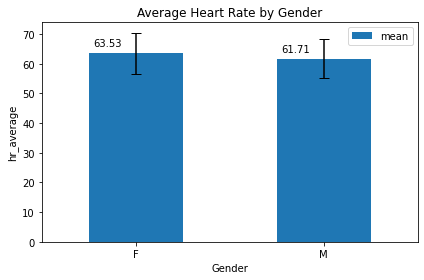

<Figure size 720x432 with 0 Axes>

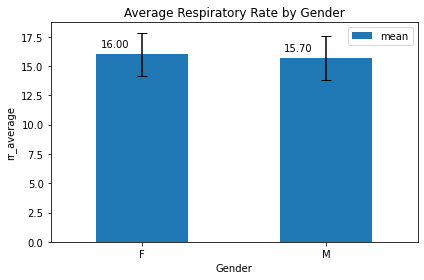

<Figure size 720x432 with 0 Axes>

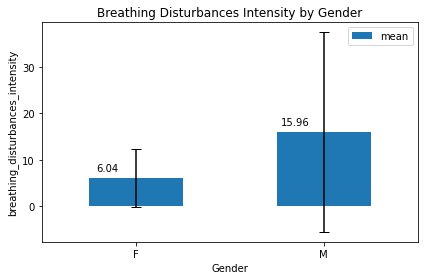

<Figure size 720x432 with 0 Axes>

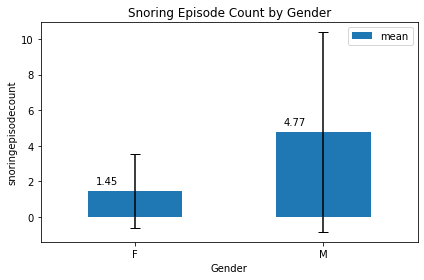

<Figure size 720x432 with 0 Axes>

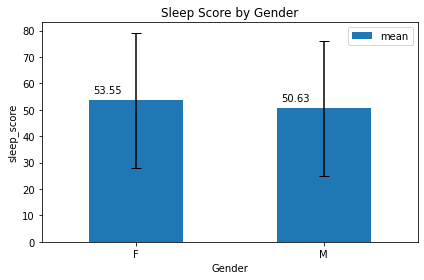

In [18]:
def plot_bar_chart_with_annotations(data, metric_name, title):
    plt.figure(figsize=(10, 6))
    ax = data.plot(kind='bar', y=metric_name, yerr='std', capsize=5)
    plt.title(title)
    plt.xlabel('Gender')
    plt.ylabel(metric_name)
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    
    # Annotate each bar with its value (moved to the left)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2. - 0.15, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

# Plotting for each metric
plot_bar_chart_with_annotations(hr_gender, 'hr_average', 'Average Heart Rate by Gender')
plot_bar_chart_with_annotations(rr_gender, 'rr_average', 'Average Respiratory Rate by Gender')
plot_bar_chart_with_annotations(breathe_gender, 'breathing_disturbances_intensity', 'Breathing Disturbances Intensity by Gender')
plot_bar_chart_with_annotations(snoring_gender, 'snoringepisodecount', 'Snoring Episode Count by Gender')
plot_bar_chart_with_annotations(sleep_score_gender, 'sleep_score', 'Sleep Score by Gender')

In [58]:
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert age groups to numeric values
#survey_demo_sleep['breathing_disturbances_intensity'] = label_encoder.fit_transform(survey_demo_sleep['breathing_disturbances_intensity'])

# Group your data by age groups
#survey_demo_sleep.dropna(subset=['breathing_disturbances_intensity'], inplace=True)
grouped_data = [survey_demo_sleep[survey_demo_sleep['gender'] == group]['sleep_score'] for group in age_labels]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Interpret the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The differences between the groups are statistically significant.")
else:
    print("There is no significant difference between the groups.")

F-statistic: nan
p-value: nan
There is no significant difference between the groups.


/home/user/anaconda3/envs/JR/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


<Figure size 720x432 with 0 Axes>

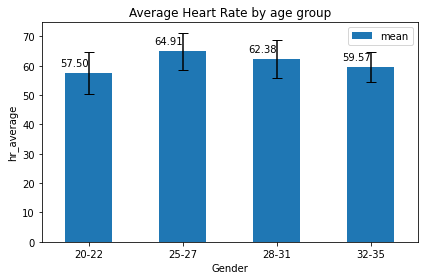

<Figure size 720x432 with 0 Axes>

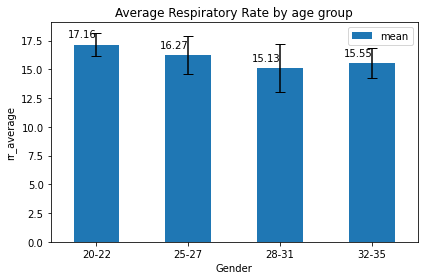

<Figure size 720x432 with 0 Axes>

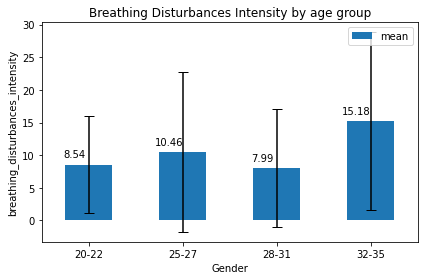

<Figure size 720x432 with 0 Axes>

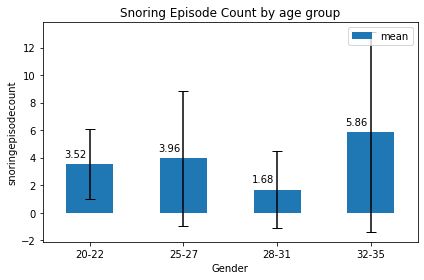

<Figure size 720x432 with 0 Axes>

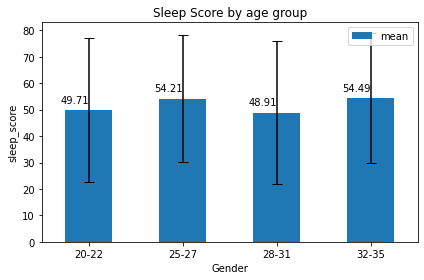

In [68]:
# Plotting for each metric
plot_bar_chart_with_annotations(hr_age, 'hr_average', 'Average Heart Rate by age group')
plot_bar_chart_with_annotations(rr_age, 'rr_average', 'Average Respiratory Rate by age group')
plot_bar_chart_with_annotations(breathe_age, 'breathing_disturbances_intensity', 'Breathing Disturbances Intensity by age group')
plot_bar_chart_with_annotations(snoring_age, 'snoringepisodecount', 'Snoring Episode Count by age group')
plot_bar_chart_with_annotations(sleep_score_age, 'sleep_score', 'Sleep Score by age group')

In [42]:
from scipy.stats import f_oneway

# Assuming 'survey_demo_sleep' is your DataFrame containing the age groups and the variable you want to test (e.g., 'sleep_score')
# 'age_group' should be the column containing the categorized age groups

# Group your data by age groups
grouped_data = [survey_demo_sleep[survey_demo_sleep['age_group'] == group]['hr_average'] for group in age_labels]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Interpret the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The differences between the groups are statistically significant.")
else:
    print("There is no significant difference between the groups.")


F-statistic: 28.197573257125722
p-value: 5.126775472242961e-17
The differences between the groups are statistically significant.


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import math

np.random.seed(0)

# Function to resample data (assuming it aggregates data by mean)
def resample_data(data, freq):
    return data.resample(freq).mean()

# Get list of all user CSV files and sort them by user ID
file_paths = sorted(glob.glob("./train_dataset/sensor_data/user*_combined.csv"),
                    key=lambda x: int(x.split('/')[-1].split('_')[0].replace('user', '')))

# Determine the number of rows needed (3 plots per row)
num_plots = len(file_paths)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

# Initialize a figure for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration if it's multi-dimensional
axes = axes.flatten()

# Loop through each file and plot
for i, file_path in enumerate(file_paths):
    # Read the CSV file
    user = pd.read_csv(file_path)

    if 'eda' not in user.columns or 'hr' not in user.columns:
        print(f"Skipping {file_path} due to missing 'eda' or 'hr' columns")
        continue
    
    # Reset the index
    user = user.reset_index()
    
    # Convert 'time' column to datetime and set it as index if it exists
    if 'timestamp' in user.columns:
        user['timestamp'] = pd.to_datetime(user['timestamp'])
        user.set_index('timestamp', inplace=True)
    
    # Resample the data to daily frequency
    user_resample = user.resample('d').mean()
    user_resample = user_resample[['eda', 'hr']]
    
    # Subset the DataFrame to keep rows where both 'hr' and 'eda' are not NaN
    user_resample = user_resample.dropna(subset=['hr', 'eda'])
    
    # Plotting the scatter plot for the cleaned DataFrame
    axes[i].scatter(user_resample['hr'], user_resample['eda'], alpha=0.5, label='Data points')
    
    # Add a regression line
    x = user_resample['hr']
    y = user_resample['eda']
    m, b = np.polyfit(x, y, 1)  # slope (m) and intercept (b) of the line of best fit
    axes[i].plot(x, m*x + b, color='red', label='Regression line')
    
    # Extract user number from file name
    user_number = file_path.split('/')[-1].split('_')[0].replace('user', '')
    
    # Calculating the Pearson correlation coefficient
    correlation = user_resample['hr'].corr(user_resample['eda'])
    
    # Add the correlation coefficient to the plot
    axes[i].text(0.05, 0.95, f'r = {correlation:.2f}', transform=axes[i].transAxes,
                 fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    
    # Setting titles and labels
    axes[i].set_title(f'user{user_number}')
    axes[i].set_xlabel('Heart Rate (hr)')
    axes[i].set_ylabel('edaerature (eda)')
    axes[i].legend()
    axes[i].grid(True)
    
    # Print the Pearson correlation coefficient
    print(f"Pearson correlation coefficient for user{user_number} between 'hr' and 'eda':", correlation)


# Adjust layout
plt.tight_layout()
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1440x0 with 0 Axes>

Demographic statistics

In [ ]:
info = pd.read_csv("./train_dataset/user_info_2020.csv")
sleep = pd.read_csv("./train_dataset/user_sleep_2020.csv")
sleep_merged = pd.merge(sleep, info, how='left', on='userId')
sleep_merged.columns

In [ ]:
sleep_merged[sleep_merged['userId'] == 'user02']

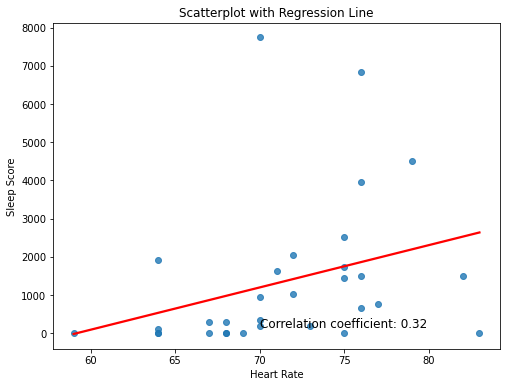

In [31]:
plt.figure(figsize=(8, 6))
df = sleep_merged[sleep_merged['userId'] == 'user07']
sns.regplot(x='hr_average', y='snoring', data=df, ci=None, line_kws={"color": "red"})
plt.title('Scatterplot with Regression Line')
plt.xlabel('Heart Rate')
plt.ylabel('Sleep Score')

# Calculate correlation coefficient
correlation_coefficient = df['hr_average'].corr(df['snoring'])
plt.text(70, 155, f'Correlation coefficient: {correlation_coefficient:.2f}', fontsize=12)

plt.show()

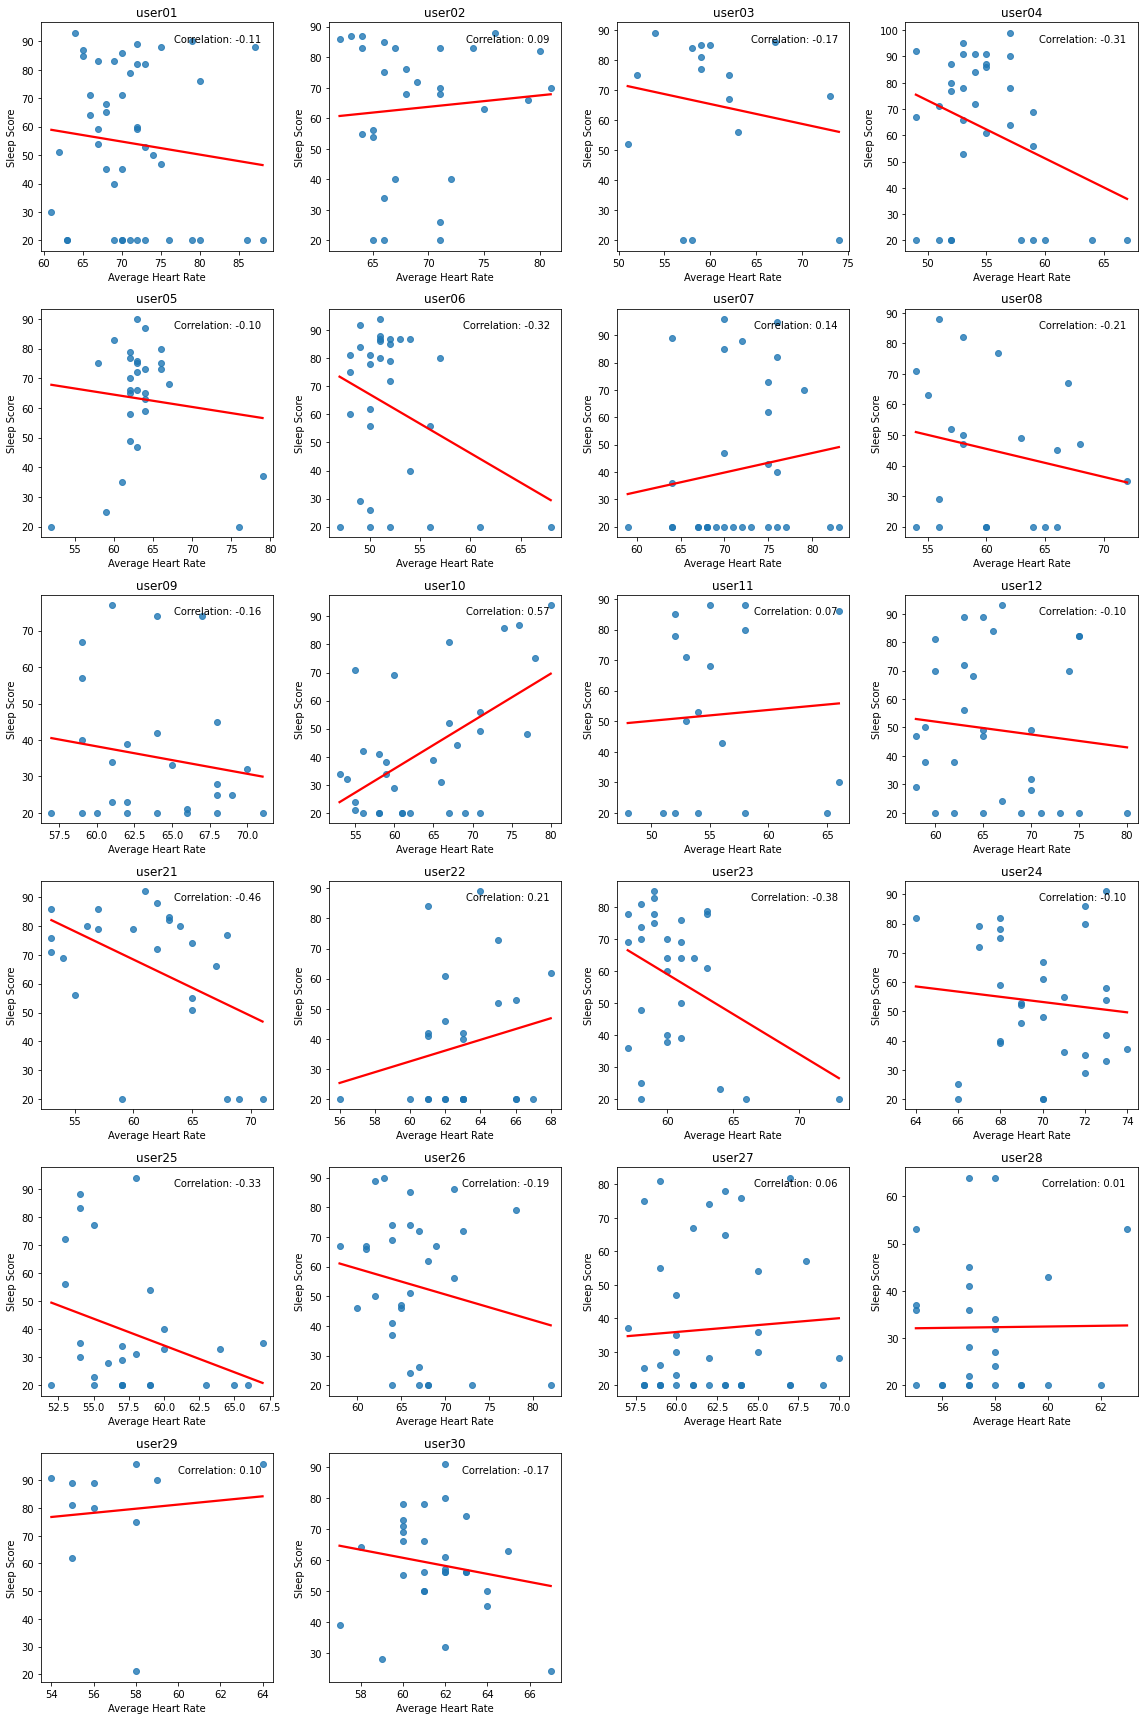

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sleep_merged is your dataframe

# Get unique user IDs and sort them
unique_users = sorted(sleep_merged['userId'].unique())

# Set up subplots
num_users = len(unique_users)
num_cols = 4
num_rows = -(-num_users // num_cols)  # Ceiling division to ensure enough rows for all users
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Flatten the axes array if it's more than one row
axes = axes.flatten()

# Iterate over each user
for i, user_id in enumerate(unique_users):
    # Filter dataframe for current user
    df_user = sleep_merged[sleep_merged['userId'] == user_id]
    
    # Plot on the current axis
    sns.regplot(x='hr_average', y='sleep_score', data=df_user, ax=axes[i], ci=None, line_kws={"color": "red"})
    axes[i].set_title(f'{user_id}')
    axes[i].set_xlabel('Average Heart Rate')
    axes[i].set_ylabel('Sleep Score')

    # Calculate and display correlation coefficient
    correlation_coefficient = df_user['hr_average'].corr(df_user['sleep_score'])
    # Position the legend at a relative position from the top-right corner of the plot
    axes[i].text(0.95, 0.95, f'Correlation: {correlation_coefficient:.2f}', fontsize=10,
                 ha='right', va='top', transform=axes[i].transAxes)

# Hide any remaining empty subplots
for j in range(num_users, num_cols * num_rows):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


Pearson correlation coefficient for user01 between 'hr' and 'eda': 0.19727810203617646
Pearson correlation coefficient for user02 between 'hr' and 'eda': 0.05811651626362817
Pearson correlation coefficient for user03 between 'hr' and 'eda': 0.3815476395309256
Pearson correlation coefficient for user04 between 'hr' and 'eda': 0.0404755952897763
Pearson correlation coefficient for user05 between 'hr' and 'eda': 0.15734546421421367
Pearson correlation coefficient for user06 between 'hr' and 'eda': 0.509563022268272
Pearson correlation coefficient for user07 between 'hr' and 'eda': -0.09289292302709494
Pearson correlation coefficient for user08 between 'hr' and 'eda': 0.4940675213179862
Pearson correlation coefficient for user09 between 'hr' and 'eda': -0.7325717177883156
Pearson correlation coefficient for user10 between 'hr' and 'eda': 0.4949206999108442
Pearson correlation coefficient for user21 between 'hr' and 'eda': nan
Pearson correlation coefficient for user22 between 'hr' and 'eda

/tmp/ipykernel_576816/2331340663.py:58: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)  # slope (m) and intercept (b) of the line of best fit
/home/user/anaconda3/envs/JR/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/user/anaconda3/envs/JR/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/user/anaconda3/envs/JR/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Pearson correlation coefficient for user30 between 'hr' and 'eda': 0.962934934655102


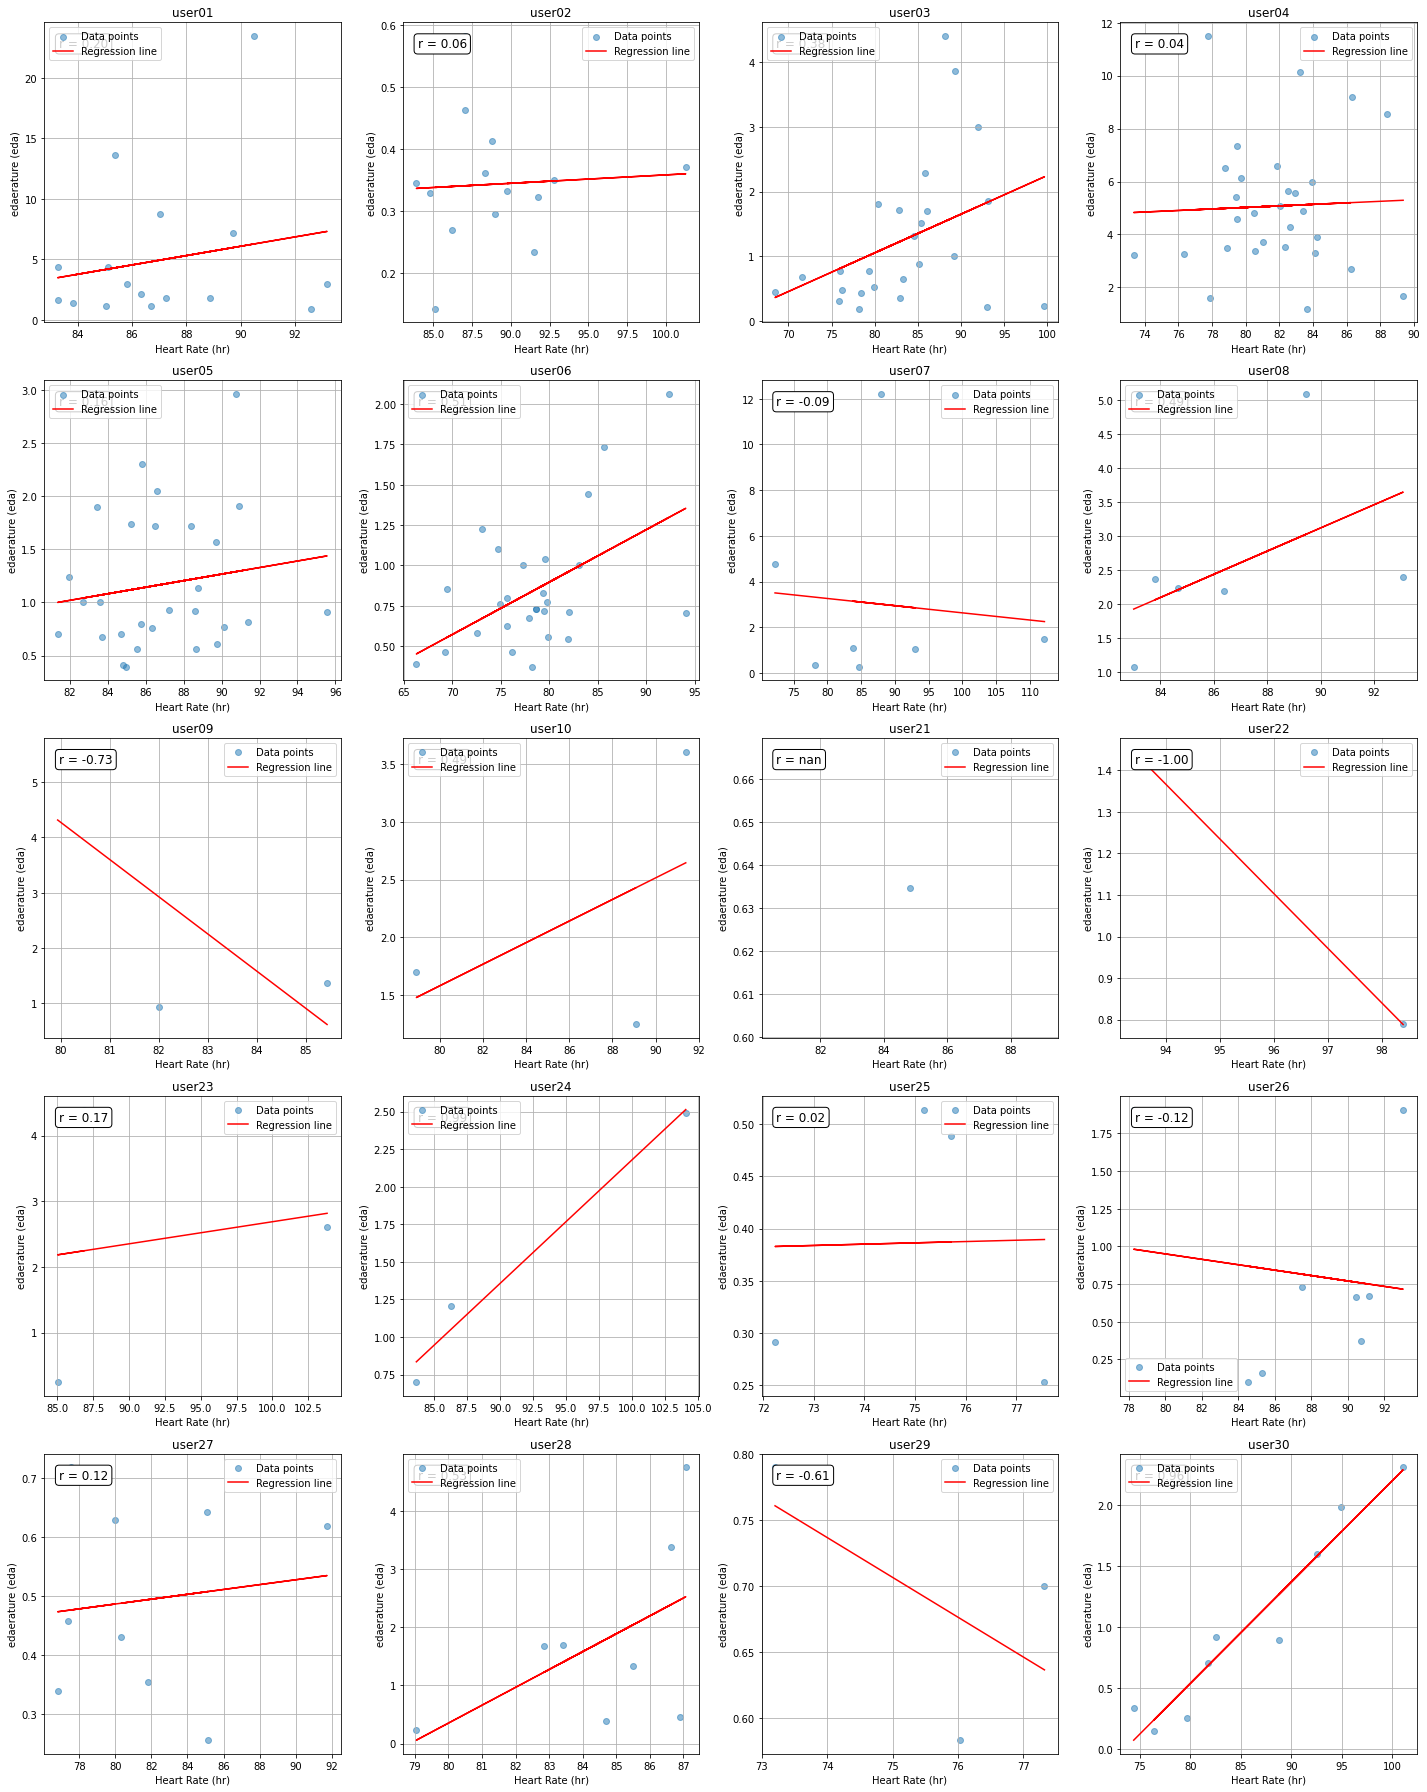

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import math

np.random.seed(0)

# Function to resample data (assuming it aggregates data by mean)
def resample_data(data, freq):
    return data.resample(freq).mean()

# Get list of all user CSV files and sort them by user ID
file_paths = sorted(glob.glob("./train_dataset/sensor_data/user*_combined.csv"),
                    key=lambda x: int(x.split('/')[-1].split('_')[0].replace('user', '')))

# Determine the number of rows needed (3 plots per row)
num_plots = len(file_paths)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

# Initialize a figure for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration if it's multi-dimensional
axes = axes.flatten()

# Loop through each file and plot
for i, file_path in enumerate(file_paths):
    # Read the CSV file
    user = pd.read_csv(file_path)

    if 'eda' not in user.columns or 'hr' not in user.columns:
        print(f"Skipping {file_path} due to missing 'eda' or 'hr' columns")
        continue
    
    # Reset the index
    user = user.reset_index()
    
    # Convert 'time' column to datetime and set it as index if it exists
    if 'timestamp' in user.columns:
        user['timestamp'] = pd.to_datetime(user['timestamp'])
        user.set_index('timestamp', inplace=True)
    
    # Resample the data to daily frequency
    user_resample = user.resample('d').mean()
    user_resample = user_resample[['eda', 'hr']]
    
    # Subset the DataFrame to keep rows where both 'hr' and 'eda' are not NaN
    user_resample = user_resample.dropna(subset=['hr', 'eda'])
    
    # Plotting the scatter plot for the cleaned DataFrame
    axes[i].scatter(user_resample['hr'], user_resample['eda'], alpha=0.5, label='Data points')
    
    # Add a regression line
    x = user_resample['hr']
    y = user_resample['eda']
    m, b = np.polyfit(x, y, 1)  # slope (m) and intercept (b) of the line of best fit
    axes[i].plot(x, m*x + b, color='red', label='Regression line')
    
    # Extract user number from file name
    user_number = file_path.split('/')[-1].split('_')[0].replace('user', '')
    
    # Calculating the Pearson correlation coefficient
    correlation = user_resample['hr'].corr(user_resample['eda'])
    
    # Add the correlation coefficient to the plot
    axes[i].text(0.05, 0.95, f'r = {correlation:.2f}', transform=axes[i].transAxes,
                 fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    
    # Setting titles and labels
    axes[i].set_title(f'user{user_number}')
    axes[i].set_xlabel('Heart Rate (hr)')
    axes[i].set_ylabel('edaerature (eda)')
    axes[i].legend()
    axes[i].grid(True)
    
    # Print the Pearson correlation coefficient
    print(f"Pearson correlation coefficient for user{user_number} between 'hr' and 'eda':", correlation)


# Adjust layout
plt.tight_layout()
plt.show()

In [59]:
daily_root = './sensor_data/daily'
file_path = os.path.join(daily_root, 'user01_daily.csv')
pd.read_csv(file_path)

index   timestamp  magnitude_mMag         hr       temp  magnitude_mGyr  \
0       0  2020-08-30      112.160668        NaN        NaN        0.138656   
1       1  2020-08-31      110.515550  88.048321  34.285992        0.184146   
2       2  2020-09-01             NaN        NaN        NaN             NaN   
3       3  2020-09-02             NaN        NaN        NaN             NaN   
4       4  2020-09-03             NaN        NaN        NaN             NaN   
5       5  2020-09-04             NaN        NaN        NaN             NaN   
6       6  2020-09-05      404.341395  86.948462  34.020060        0.235271   
7       7  2020-09-06             NaN        NaN        NaN             NaN   
8       8  2020-09-07      177.900004  83.276502  33.715985        0.177400   
9       9  2020-09-08      301.395813  83.562526  34.422538        0.176495   
10     10  2020-09-09             NaN        NaN        NaN             NaN   
11     11  2020-09-10             NaN        NaN        NaN             NaN   
12     12  2020-09-11             NaN        NaN        NaN             NaN   
13     13  2020-09-12      578.051071  84.640948  33.725416        0.154191   
14     14  2020-09-13      876.917580  85.534146  33.783027        0.188016   
15     15  2020-09-14      313.374228  85.433483  33.826538        0.164518   
16     16  2020-09-15             NaN        NaN        NaN             NaN   
17     17  2020-09-16             NaN        NaN        NaN             NaN   
18     18  2020-09-17      118.957592  89.689396  32.772157        0.188283   
19     19  2020-09-18       60.133829  88.873824  34.714241        0.010647   
20     20  2020-09-19       58.422155  86.487279  34.312839        0.106036   
21     21  2020-09-20      164.348895  87.859088  33.534734        0.173514   
22     22  2020-09-21      113.175356        NaN        NaN        0.363651   
23     23  2020-09-22      132.736556  92.629167  32.587166        0.422664   
24     24  2020-09-23       90.382458  89.747285  33.752963        0.126595   
25     25  2020-09-24             NaN        NaN        NaN             NaN   
26     26  2020-09-25      287.935347  86.694550  33.314875        0.365041   
27     27  2020-09-26      357.465963  87.058741  33.362327        0.248595   
28     28  2020-09-27       82.726309  86.629254  33.792389        0.110955   

          lat         lon    accuracy        eda  magnitude_mAcc  \
0   37.498125  127.023946   14.522160        NaN        9.848232   
1   37.434475  127.006007  556.002179  30.567998        9.890882   
2         NaN         NaN         NaN        NaN             NaN   
3         NaN         NaN         NaN        NaN             NaN   
4         NaN         NaN         NaN        NaN             NaN   
5         NaN         NaN         NaN        NaN             NaN   
6   37.483732  127.002995  593.849696   8.661084        9.920032   
7         NaN         NaN         NaN        NaN             NaN   
8   37.483340  127.003794  701.179964   1.653478        9.898526   
9   37.485640  126.997483   35.104170   4.356873        9.864902   
10        NaN         NaN         NaN        NaN             NaN   
11        NaN         NaN         NaN        NaN             NaN   
12        NaN         NaN         NaN        NaN             NaN   
13  37.493756  127.027341   21.254385  13.067173        9.933847   
14  37.454155  127.037385   18.880354   2.839251        9.934560   
15  37.398172  127.060920   34.472584   1.132502        9.898333   
16        NaN         NaN         NaN        NaN             NaN   
17        NaN         NaN         NaN        NaN             NaN   
18  37.422074  127.054208   14.784925   7.930174        9.914838   
19  37.482449  126.956313   13.251571   1.767589        9.746960   
20  37.482241  126.982638   15.040337   1.435352        9.805579   
21  37.496204  127.011486   41.117143   2.758714        9.898579   
22  37.480293  126.958174   11.485245        NaN       10.065610   
2

In [1]:
import shutil 

def move_file(src_file_path: str, dest_dir_path: str):
    try:
        src_file = Path(src_file_path)
        dest_dir = Path(dest_dir_path)
        
        if not src_file.exists():
            print(f"Source file '{src_file}' does not exist.")
            return
        
        if not dest_dir.is_dir():
            print(f"Destination directory '{dest_dir}' is invalid.")
            return
        
        shutil.move(src_file, dest_dir)
        print(f"Moved '{src_file}' to '{dest_dir}' successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [1]:
import shutil 
from pathlib import Path

def move_file(src_file_path: str, dest_dir_path: str):
    try:
        src_file = Path(src_file_path)
        dest_dir = Path(dest_dir_path)
        
        if not src_file.exists():
            print(f"Source file '{src_file}' does not exist.")
            return
        
        if not dest_dir.is_dir():
            print(f"Destination directory '{dest_dir}' is invalid.")
            return
        
        shutil.move(src_file, dest_dir)
        print(f"Moved '{src_file}' to '{dest_dir}' successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
root_dir = Path()
dest_dir = Path()
dest_dir.mkdir(parents=True, exist_ok=True)


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
root_dir = './sensor_data'
subdirs_order = ['minutely', 'hourly', 'daily']

# to store dataframes by username
user_dfs = {}

for subdir in subdirs_order:
    subdir_path = os.path.join(root_dir, subdir)
    
    if os.path.isdir(subdir_path):
        # Get list of csv files in subdirectory
        csv_files = [file for file in os.listdir(subdir_path) if file.endswith('.csv')]
        
        for csv_file in csv_files:
            file_path = os.path.join(subdir_path, csv_file)
            
            df = pd.read_csv(file_path)
            
            if 'hr' in df.columns and 'temp' in df.columns:
                # Get username
                username = csv_file.split("_")[0]
                
                if username not in user_dfs:
                    user_dfs[username] = []
                user_dfs[username].append(df)
            else:
                print(f"Skipping {csv_file}: 'hr' or 'temp' column not found.")

# Loop through dataframes by username
for username, dfs in user_dfs.items():
    # Combine all dataframes for the same username
    combined_df = pd.concat(dfs)
    
    # Plot correlation with regression line
    corr = combined_df[['hr', 'temp']].corr().iloc[0, 1]

    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
    plot_titles = ['Minutely', 'Hourly', 'Daily']
    
    for idx, (ax, subdir) in enumerate(zip(axes, subdirs_order)):
        sns.regplot(x='hr', y='temp', data=combined_df, ax=ax, color='red')
        ax.set_title(f"{plot_titles[idx]} data for {username}, corr: {corr:.2f}")
        ax.set_xlabel('Heart Rate')
        if idx == 0:
            ax.set_ylabel('Temperature')

        plt.subtitle(f'Correlation Plots')
        plt.show()

Skipping user11_minutely.csv: 'bvp_negative' or 'hr' column not found.
Skipping user11_hourly.csv: 'bvp_negative' or 'hr' column not found.
Skipping user11_daily.csv: 'bvp_negative' or 'hr' column not found.


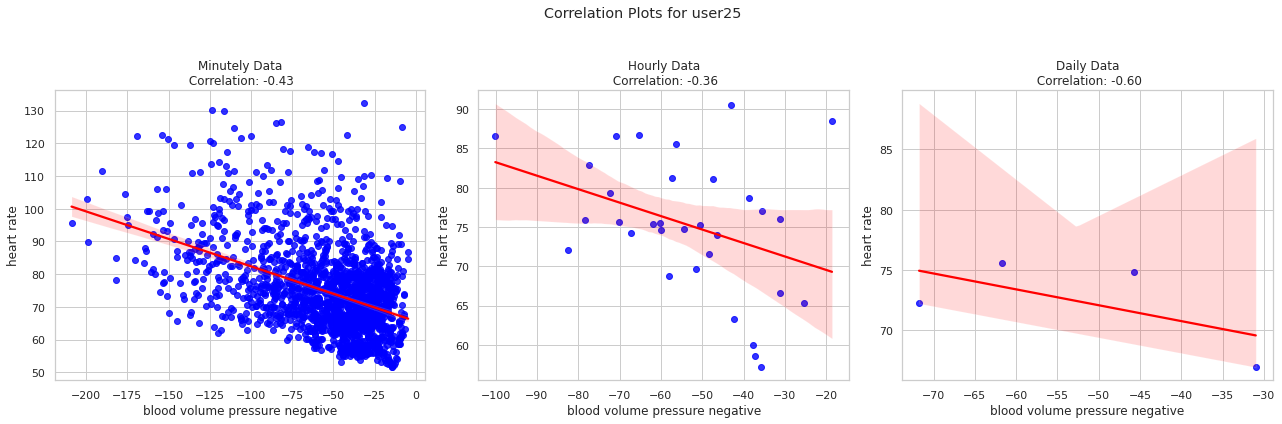

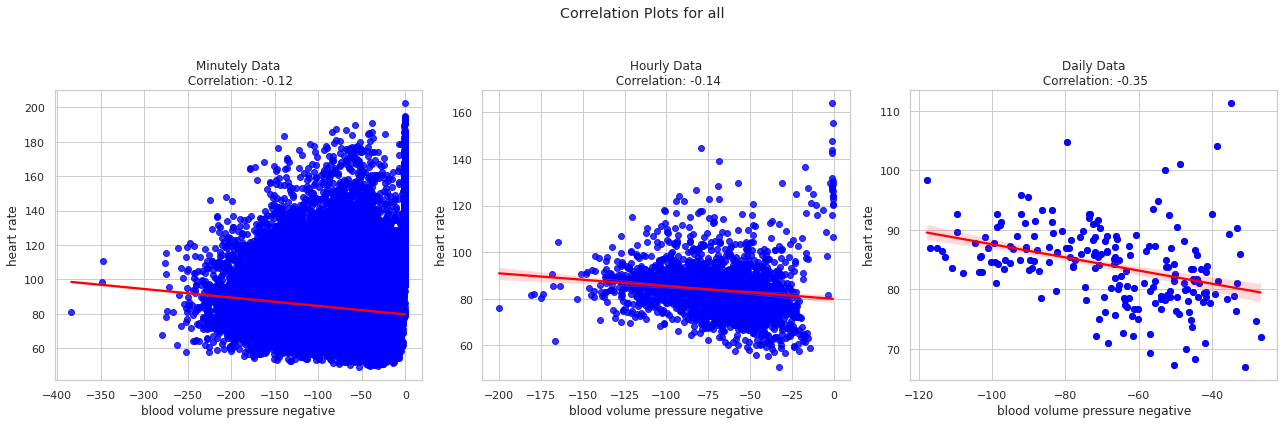

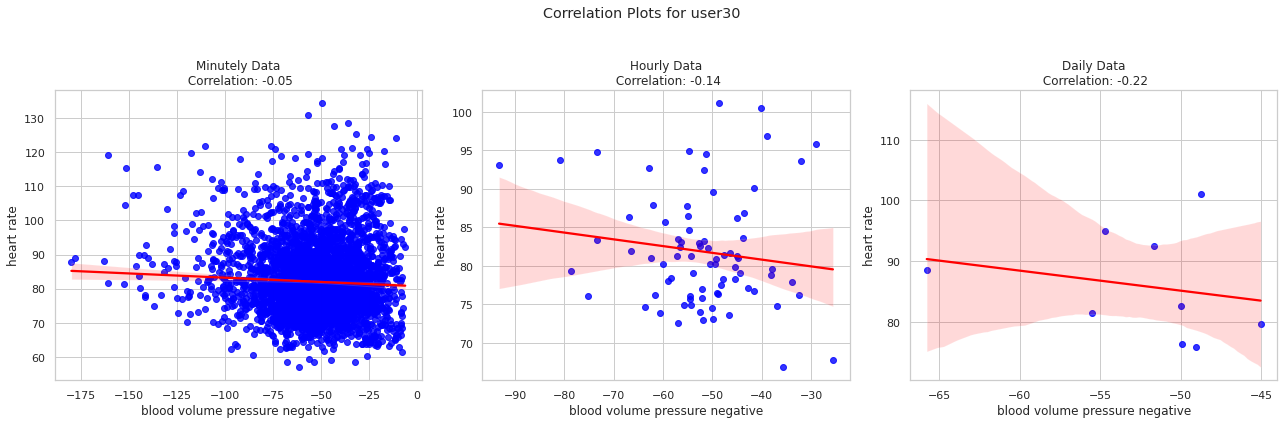

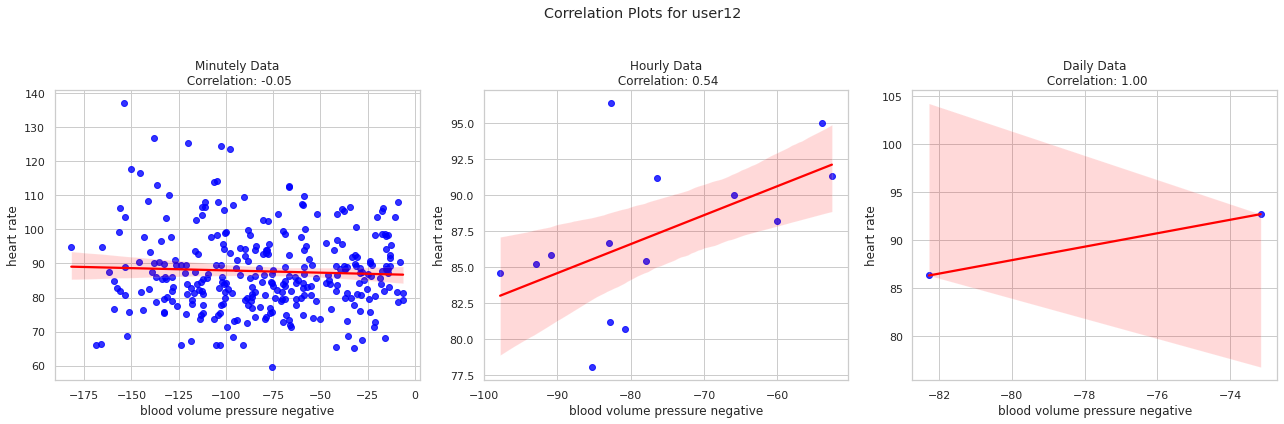

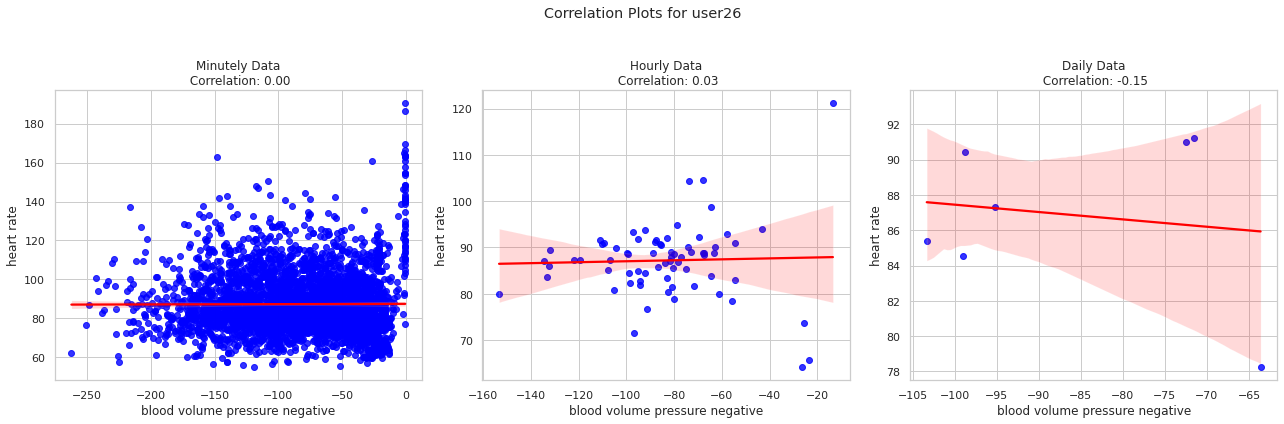

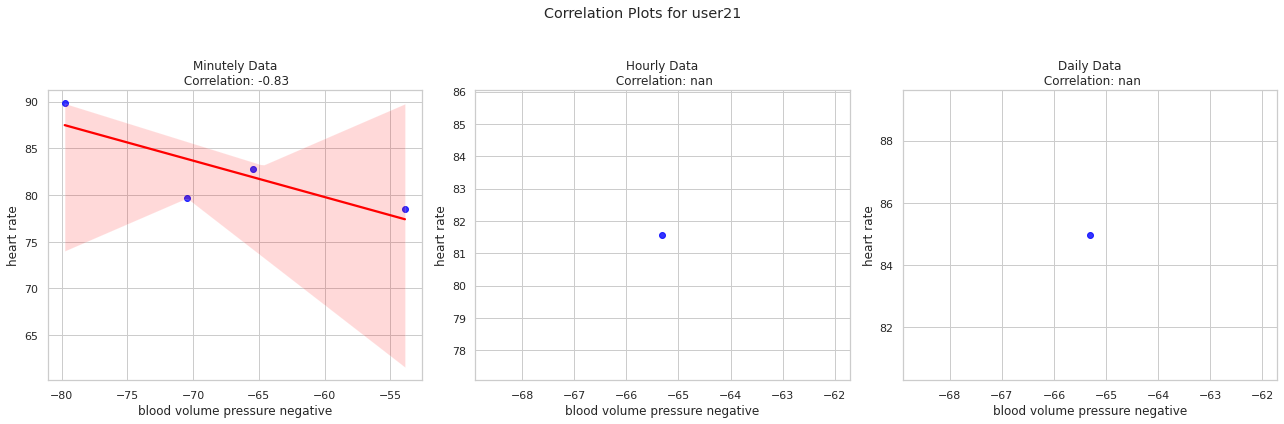

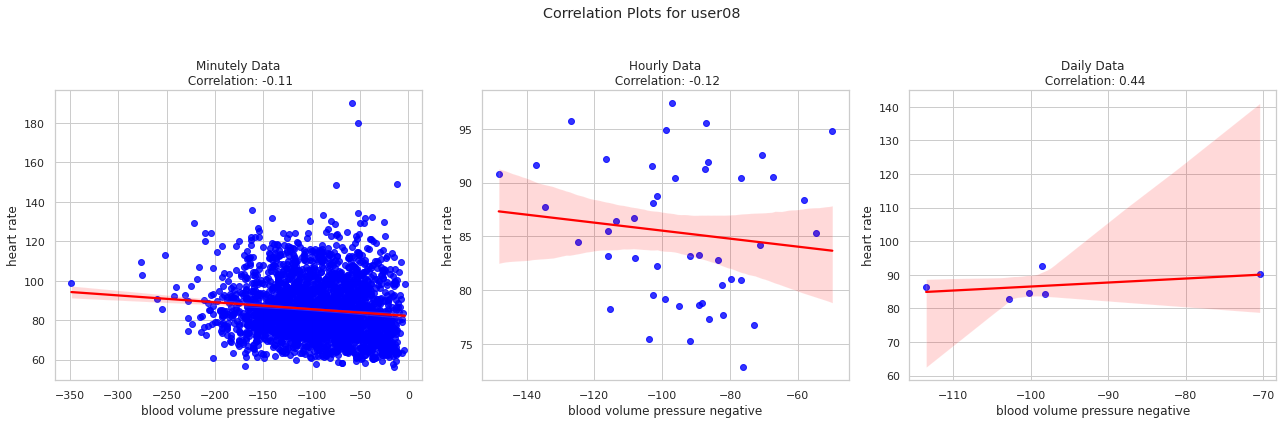

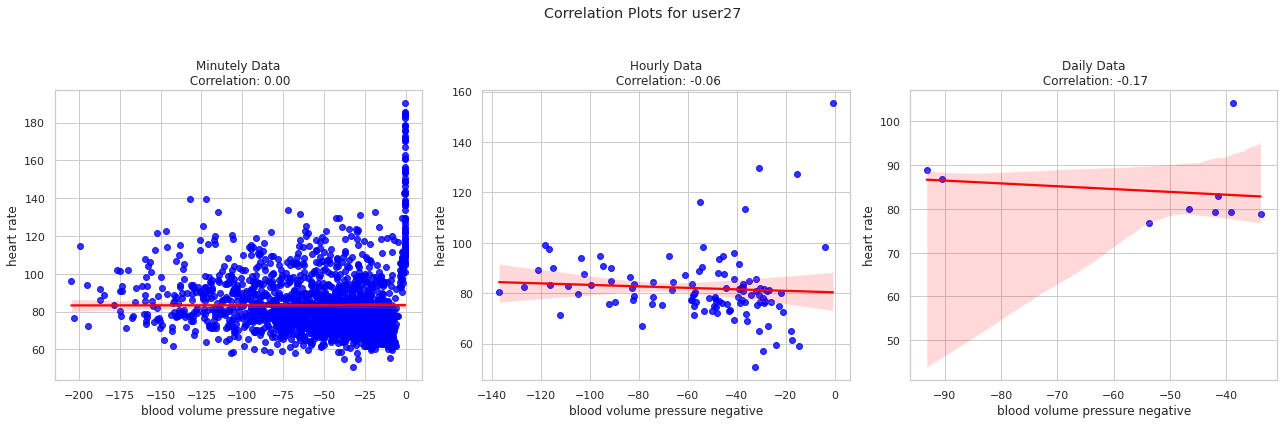

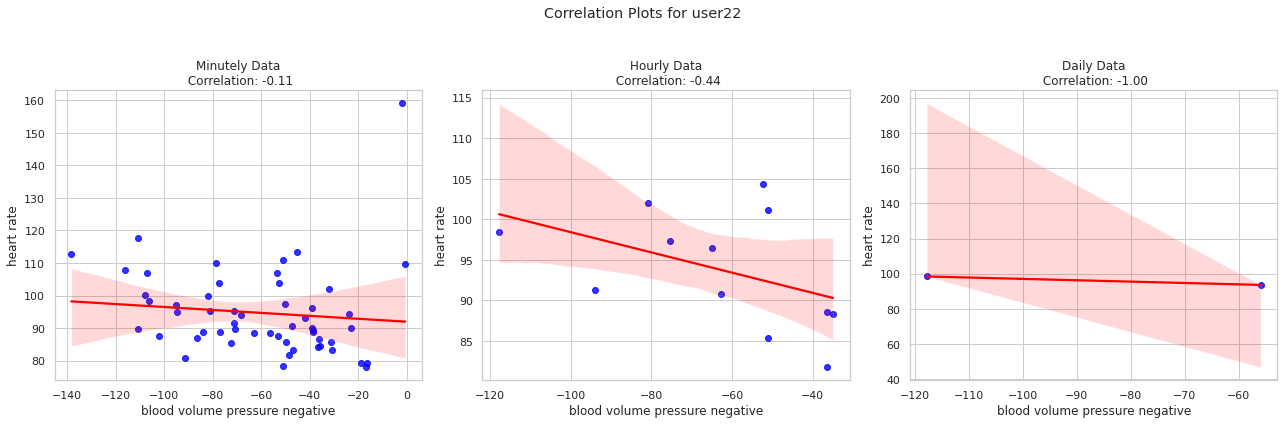

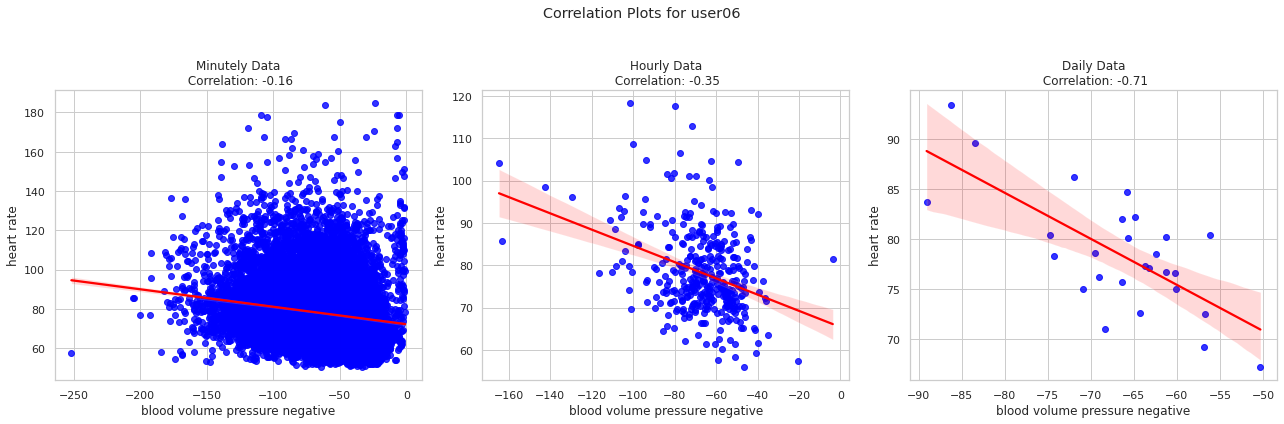

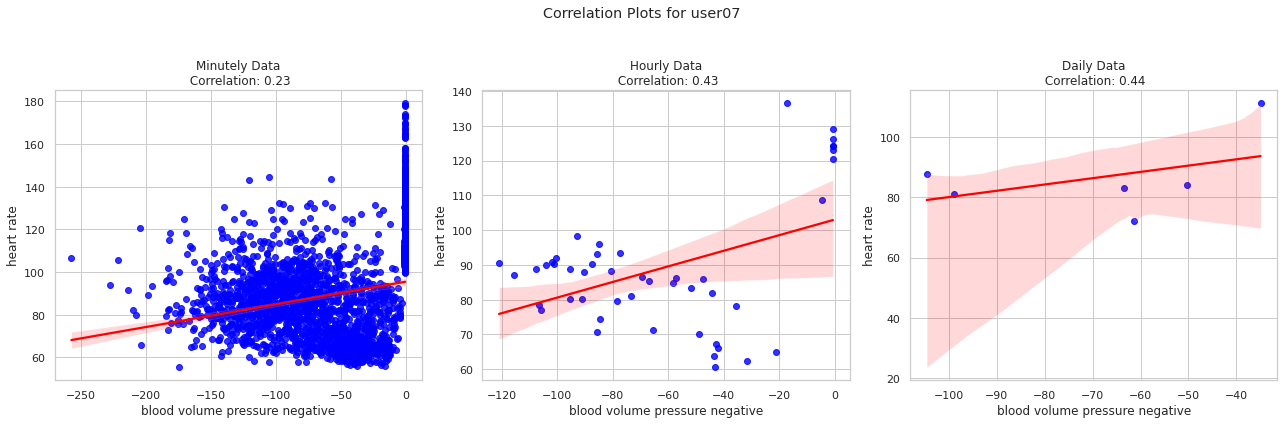

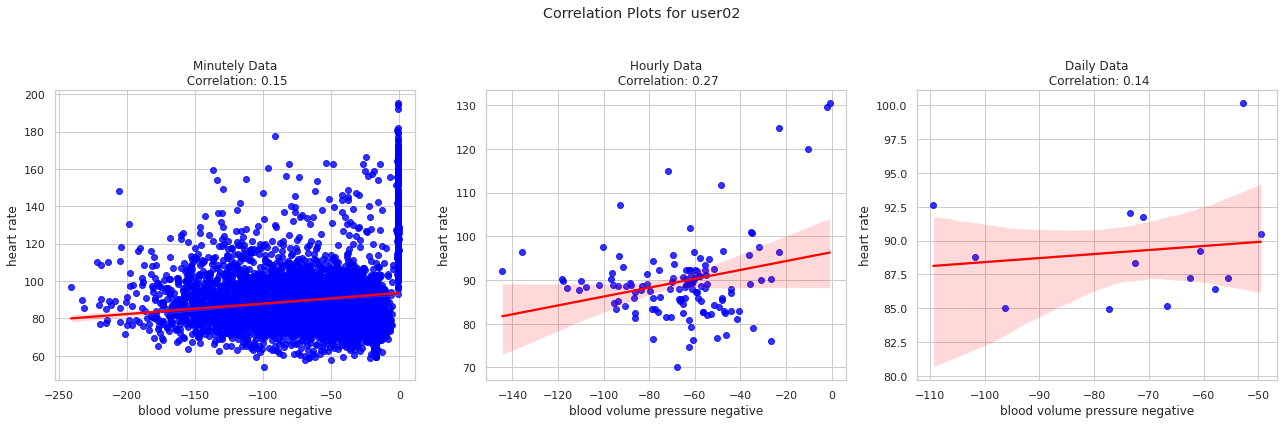

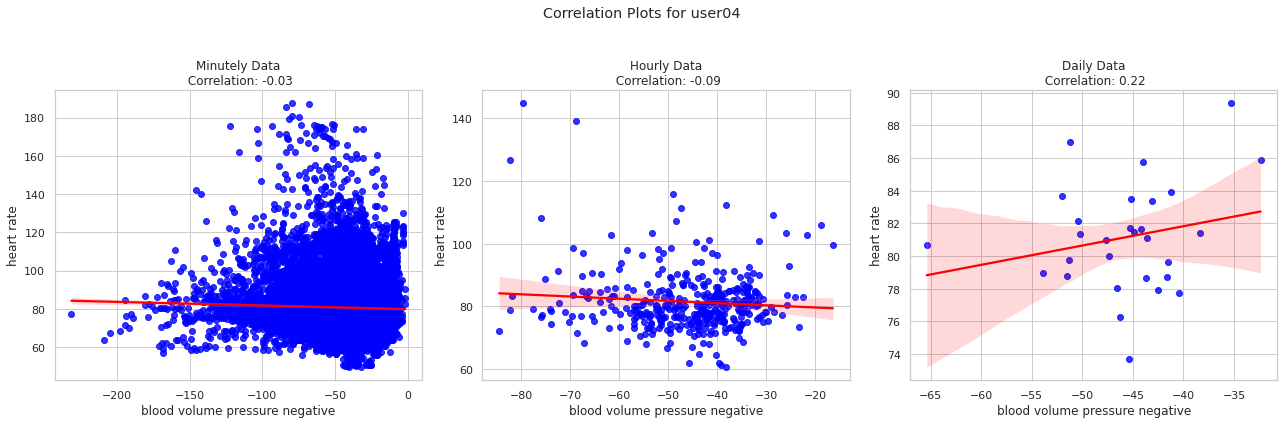

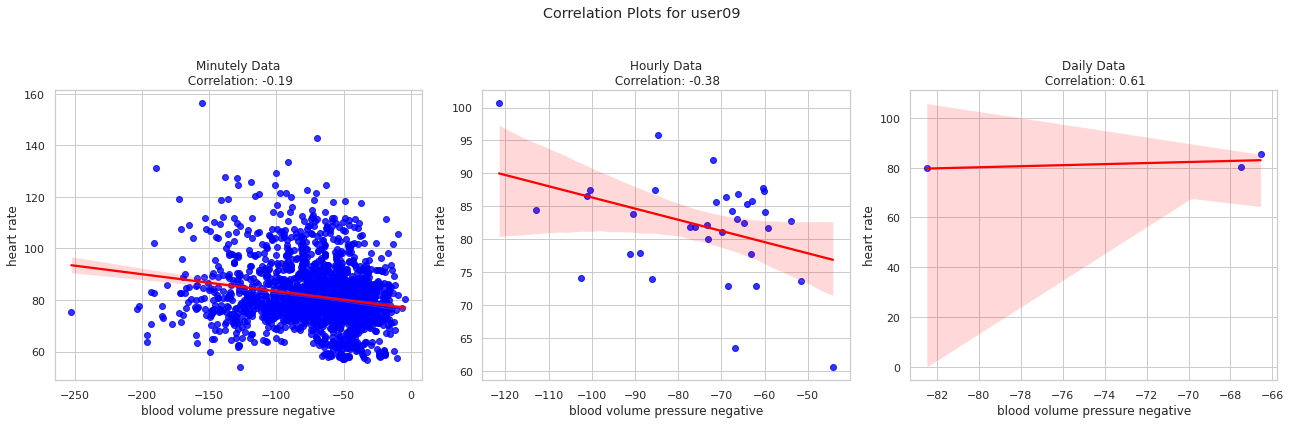

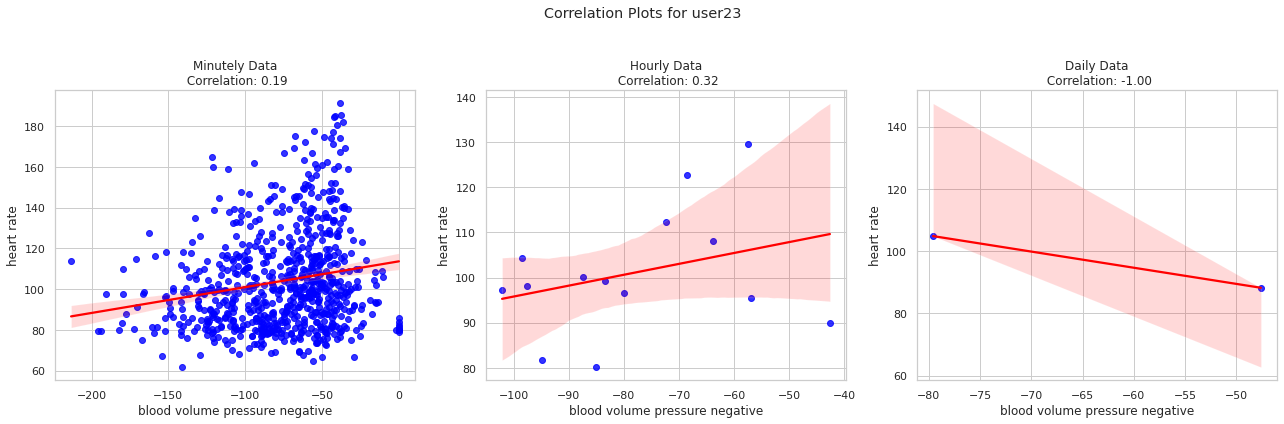

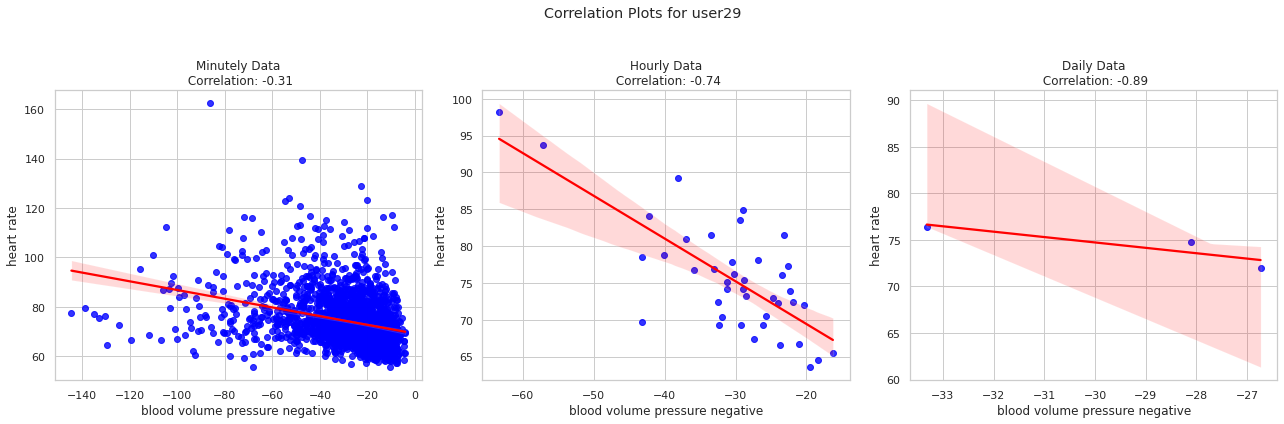

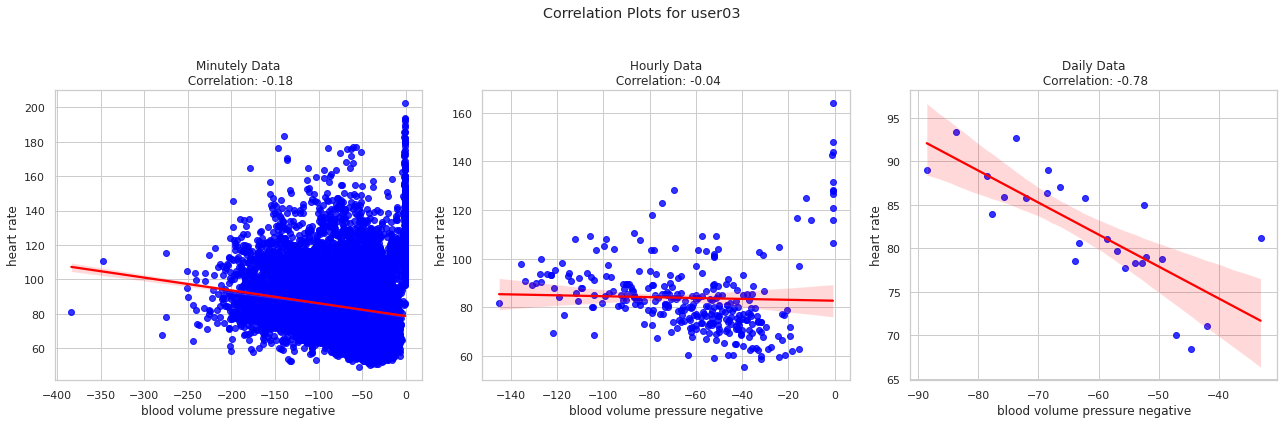

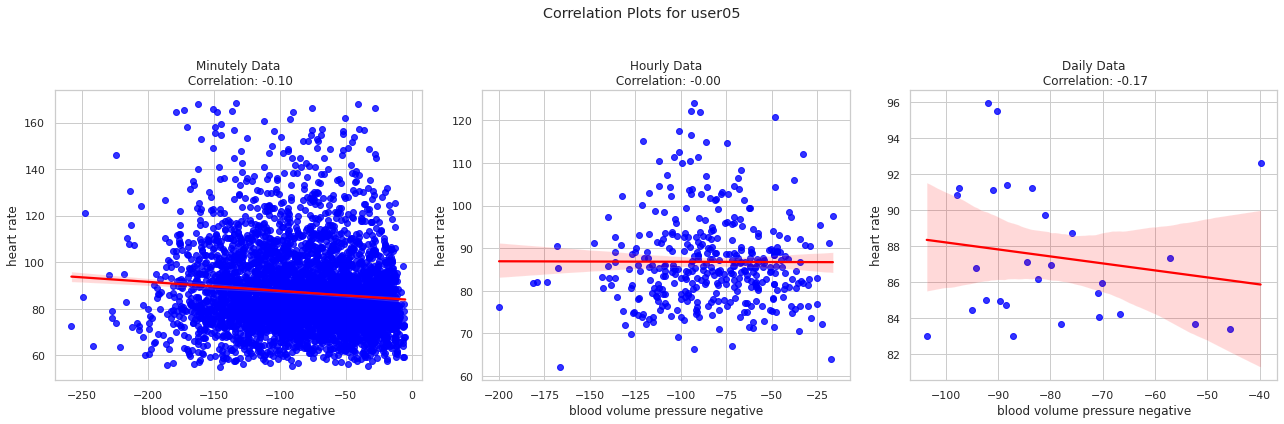

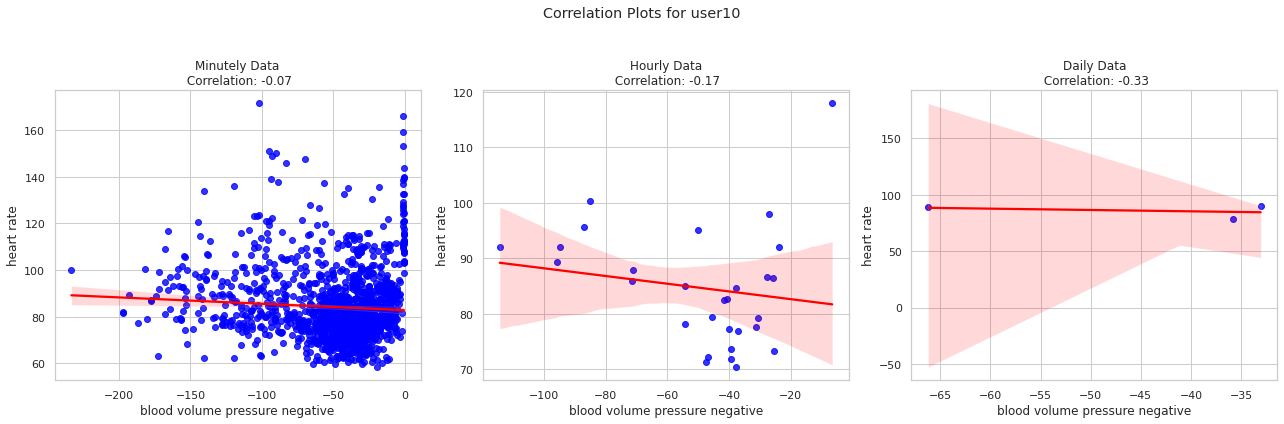

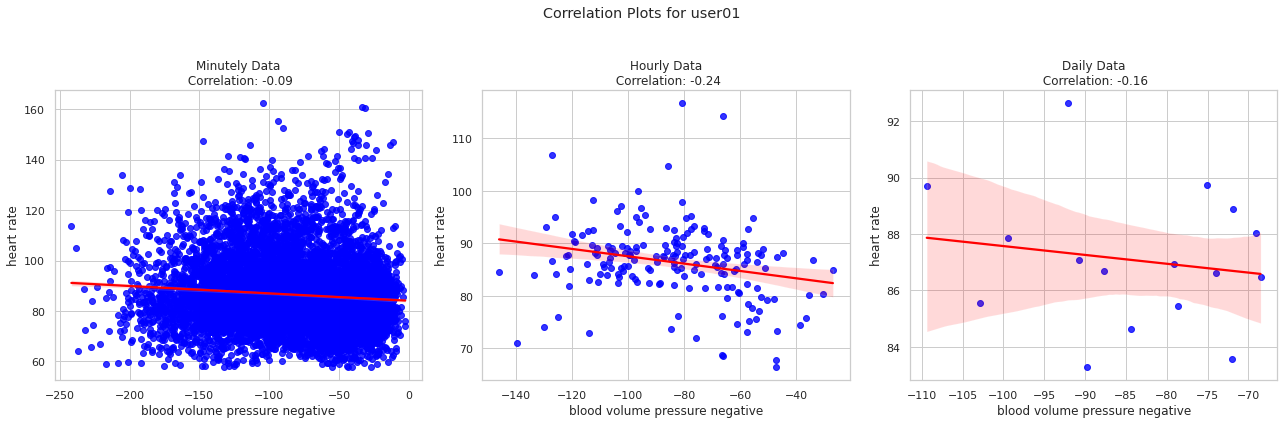

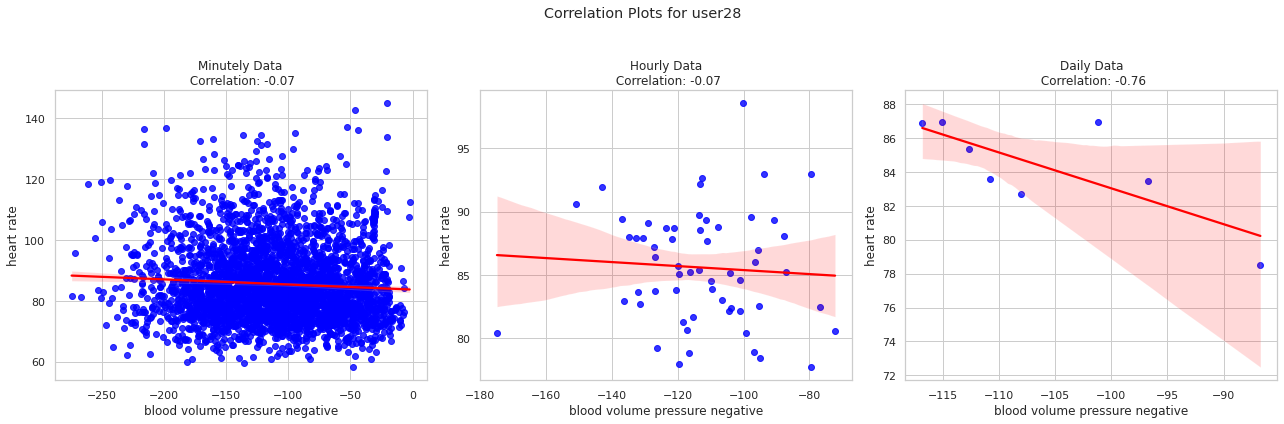

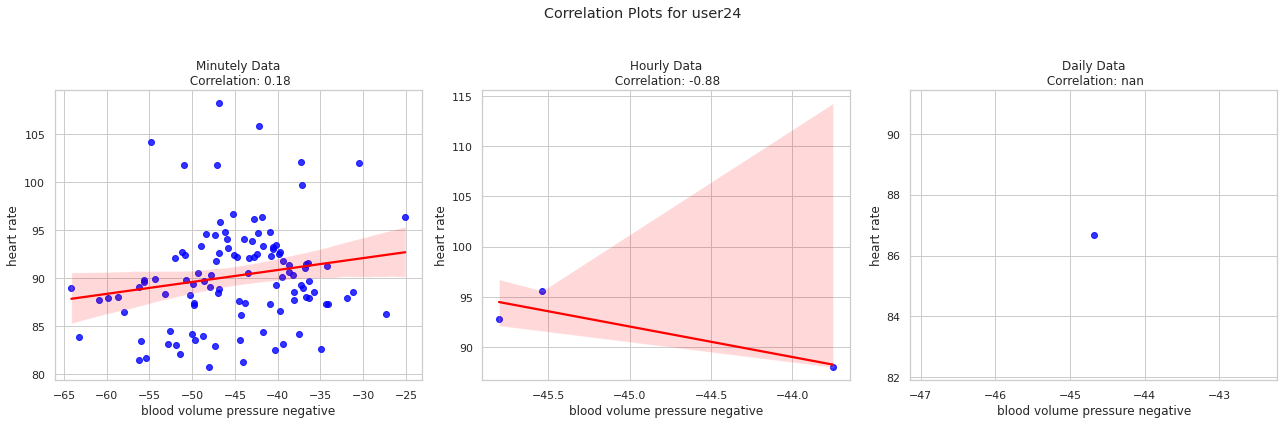

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')

# Root directory
root_dir = './sensor_data'

# Define the order of subdirectories
subdirs_order = ['minutely', 'hourly', 'daily']

# Initialize a dictionary to store dataframes by username
user_dfs = {}

# Loop tbvp_negativeough subdirectories
for subdir in subdirs_order:
    subdir_path = os.path.join(root_dir, subdir)
    
    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Get list of CSV files in subdirectory
        csv_files = [file for file in os.listdir(subdir_path) if file.endswith('.csv')]
        
        # Loop tbvp_negativeough CSV files
        for csv_file in csv_files:
            file_path = os.path.join(subdir_path, csv_file)
            
            # Read CSV file
            df = pd.read_csv(file_path)
            
            # Check if 'bvp_negative' and 'hr' columns exist
            if 'bvp_negative' in df.columns and 'hr' in df.columns:
                # Get username from the filename
                username = csv_file.split("_")[0]
                
                # Add the dataframe to the dictionary by username
                if username not in user_dfs:
                    user_dfs[username] = []
                user_dfs[username].append(df)
            else:
                print(f"Skipping {csv_file}: 'bvp_negative' or 'hr' column not found.")

# Loop tbvp_negativeough dataframes by username
for username, dfs in user_dfs.items():
    # Combine all dataframes for the same username
    combined_df = pd.concat(dfs)
    
    # Create a figure with 3 subplots in 1 row
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot correlation with regression line for the combined data
    for i, (subdir, ax) in enumerate(zip(subdirs_order, axes.flatten())):
        subdir_dfs = [df for df, dir in zip(dfs, subdirs_order) if dir == subdir]
        if subdir_dfs:
            subdir_combined_df = pd.concat(subdir_dfs)
            corr = subdir_combined_df[['bvp_negative', 'hr']].corr().iloc[0, 1]
            sns.regplot(x='bvp_negative', y='hr', data=subdir_combined_df, ax=ax,
                        scatter_kws={'color':'blue'}, line_kws={'color':'red'})
            ax.set_title(f'{subdir.capitalize()} Data\n Correlation: {corr:.2f}')
            ax.set_xlabel('blood volume pressure negative')
            ax.set_ylabel('heart rate')
        else:
            ax.set_visible(False)
    
    # Set the main title for the entire figure
    plt.suptitle(f'Correlation Plots for {username}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    output_dir = './figures'
    output_path = os.path.join(output_dir, f"{username}_hr_bvp_negative_corr.png")
    plt.savefig(output_path)
    plt.show()



사람별로 나누지 않고 모든 데이터를 봤을 때

In [28]:
def concat_all_users(folder_path, resolution):
    combined_df = pd.DataFrame()

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path)
            combined_df = pd.concat([combined_df, df], axis=0)
    
    combined_filename = f"all_users_{resolution}.csv"
    combined_filepath = os.path.join(folder_path, combined_filename)
    combined_df.to_csv(combined_filepath, index=False)

folder_path = './sensor_data/minutely'
concat_all_users(folder_path, 'minutely')

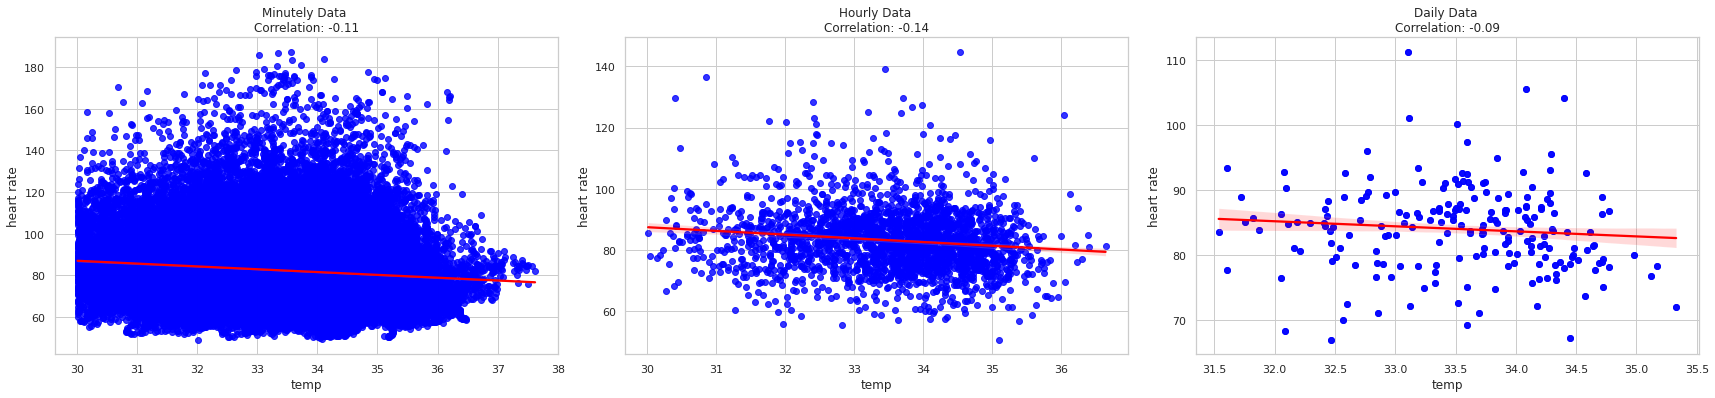

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
all_users_daily = pd.read_csv("./sensor_data/daily/all_users_daily.csv")
all_users_hourly = pd.read_csv("./sensor_data/hourly/all_users_hourly.csv")
all_users_minutely = pd.read_csv("./sensor_data/minutely/all_users_minutely.csv")

# Create the figure and axis objects
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Define a function to create the regression plot
def create_regplot(data, ax, title):
    corr = data[['temp', 'hr']].corr().iloc[0, 1]
    sns.regplot(x='temp', y='hr', data=data, color='blue', ax=ax, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    ax.set_xlabel('temp')
    ax.set_ylabel('heart rate')
    #ax.set_title(title)
    ax.set_title(f"{title} \nCorrelation: {corr:.2f}")


    
# Create the regression plots for each dataset
create_regplot(all_users_minutely, axes[0], 'Minutely Data')
create_regplot(all_users_hourly, axes[1], 'Hourly Data')
create_regplot(all_users_daily, axes[2], 'Daily Data')

plt.tight_layout(rect=[0, 0, 1, 0.95])
output_dir = './figures'
output_path = os.path.join(output_dir, f"all_users_hr_temp_corr.png")
plt.savefig(output_path)
plt.show()


In [ ]:
import os
import pandas as pd

# Define directories
hourly_dir = './sensor_data/hourly'
labels_dir = './sensor_data/labels'
output_dir = './sensor_data'

# Get list of files in each directory
hourly_files = os.listdir(hourly_dir)
labels_files = os.listdir(labels_dir)

# Extract common IDs
common_ids = set([file.split('_')[0] for file in hourly_files]).intersection([file.split('_')[0] for file in labels_files])

# Iterate over common IDs
for common_id in common_ids:
    # Load hourly and labels data for the current common ID
    hourly_file = os.path.join(hourly_dir, f'{common_id}_hourly.csv')
    labels_file = os.path.join(labels_dir, f'{common_id}_labels.csv')
    
    if os.path.exists(hourly_file) and os.path.exists(labels_file):
        # Read CSV files
        hourly_df = pd.read_csv(hourly_file)
        labels_df = pd.read_csv(labels_file)
        
        # Merge dataframes on timestamp
        merged_df = pd.merge(hourly_df, labels_df, how='left', on='timestamp')
        
        # Save merged dataframe
        output_file = os.path.join(output_dir, f'{common_id}_label_merged.csv')
        merged_df.to_csv(output_file, index=False)
        print(f'Merged data saved to {output_file}')
    else:
        print(f'Files not found for {common_id}')


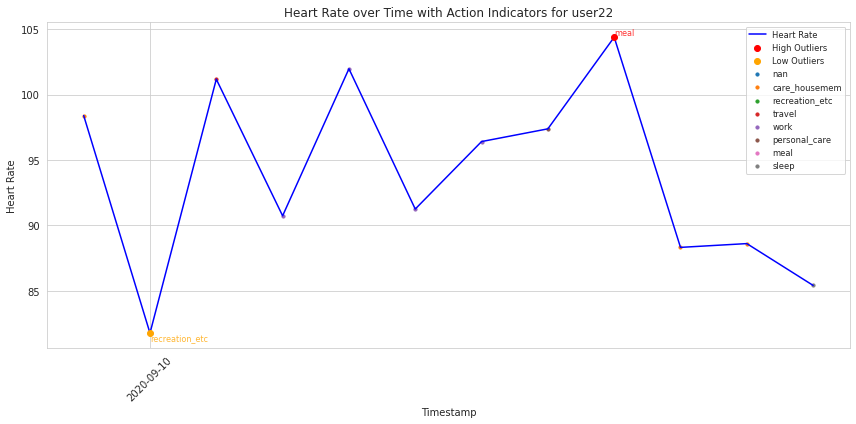

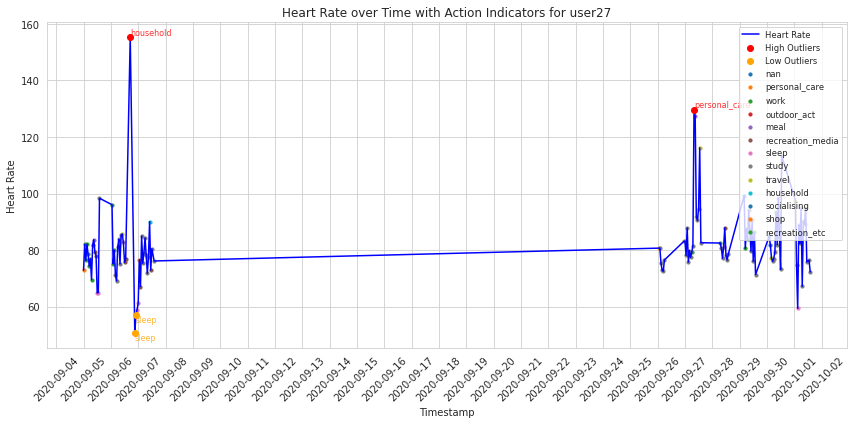

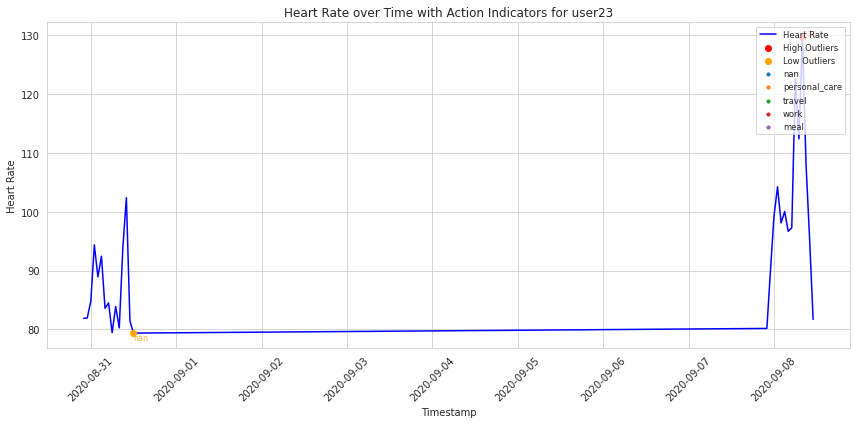

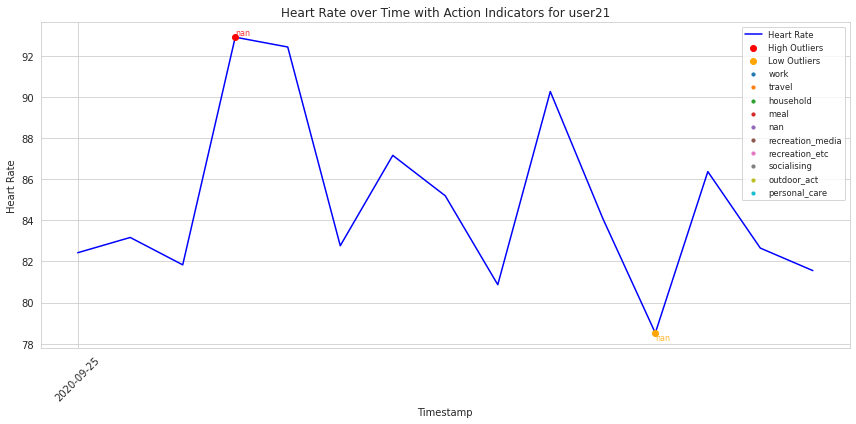

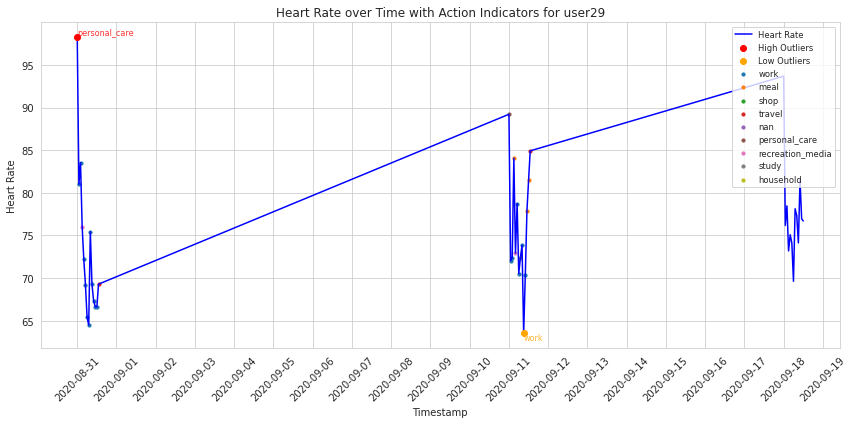

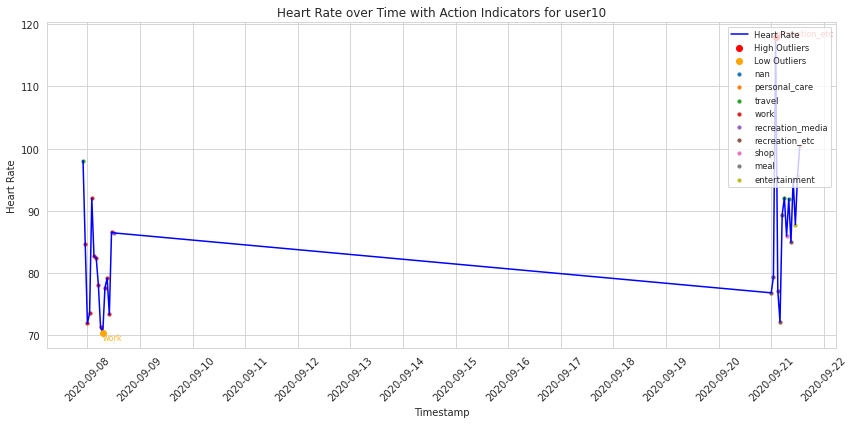

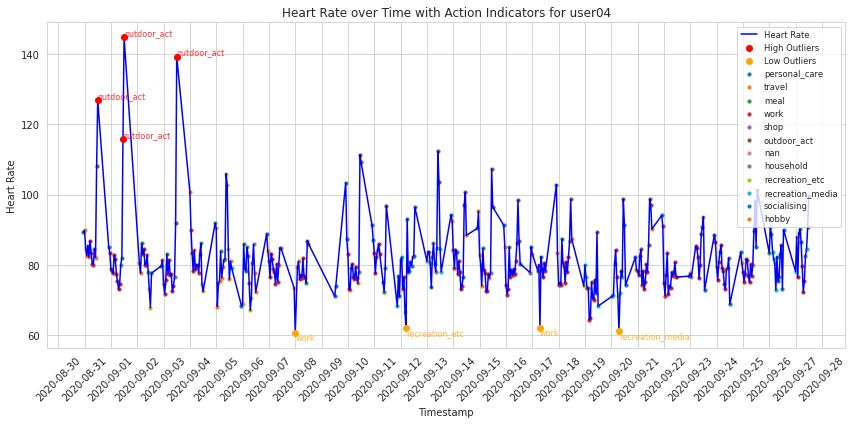

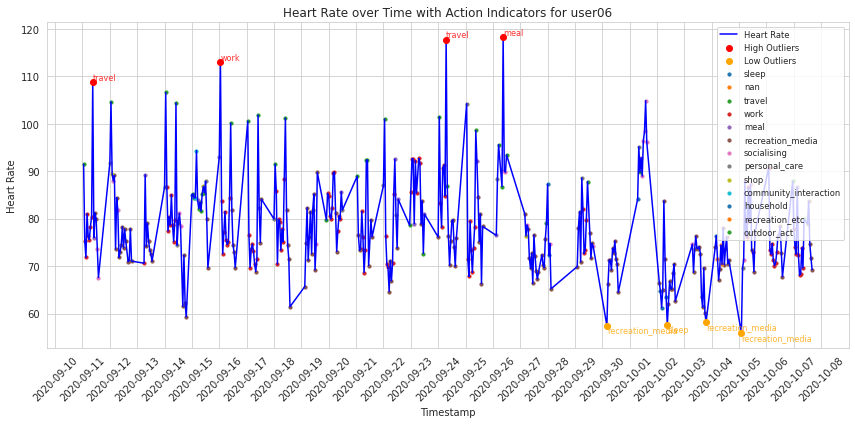

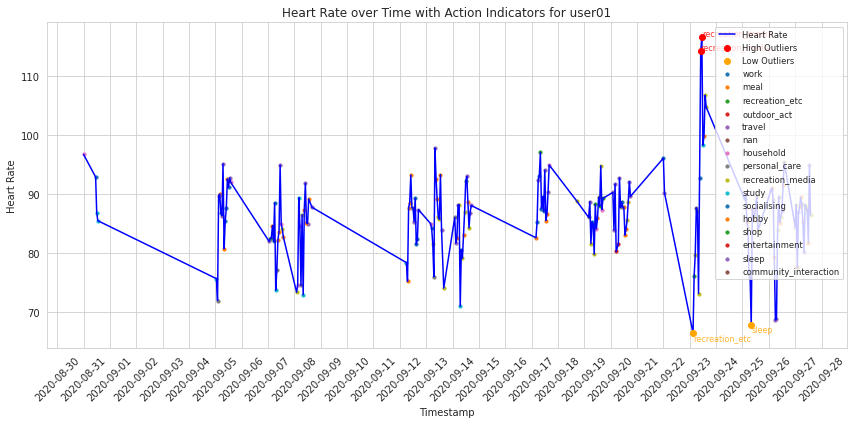

Skipping 'user11_label_merged.csv' as 'hr' column does not exist in the dataframe.


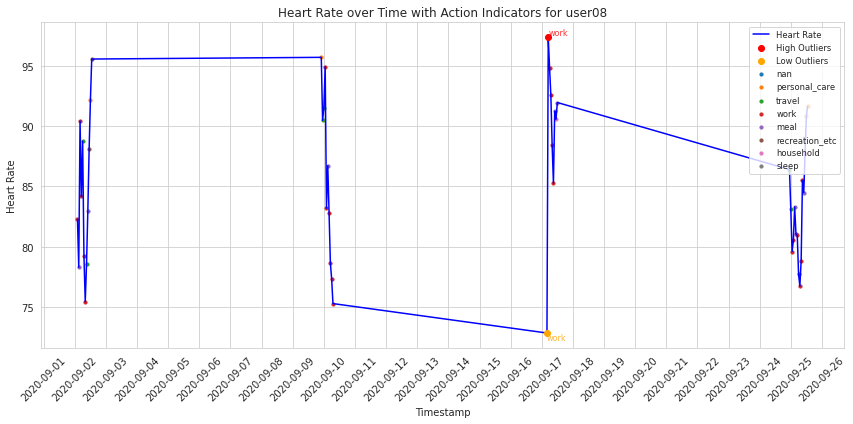

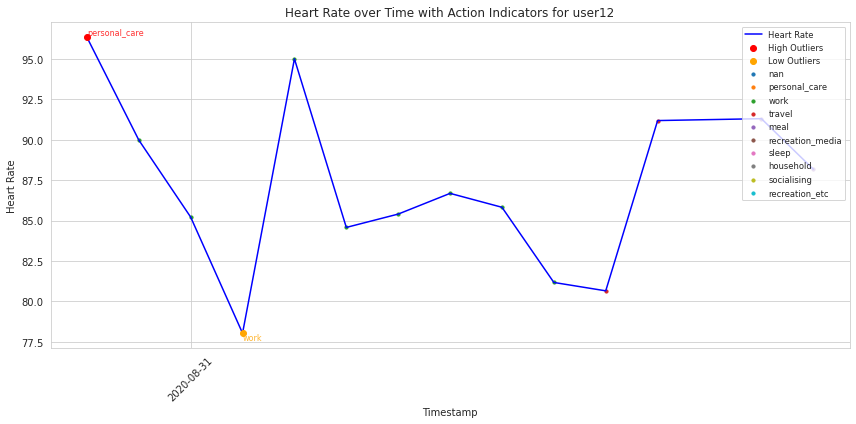

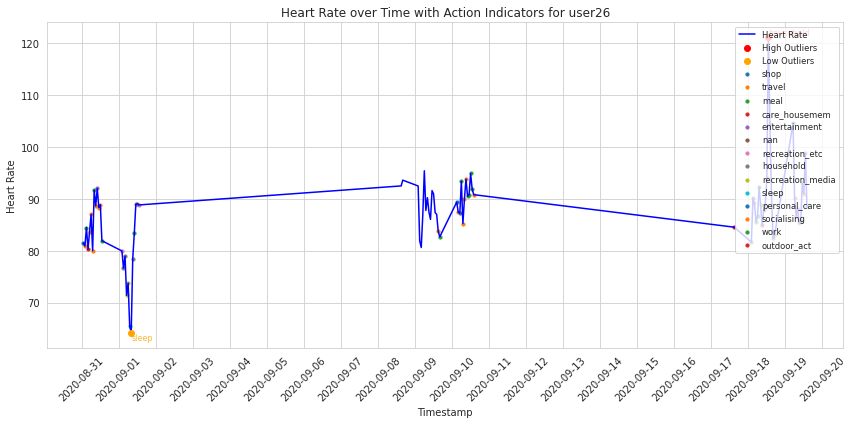

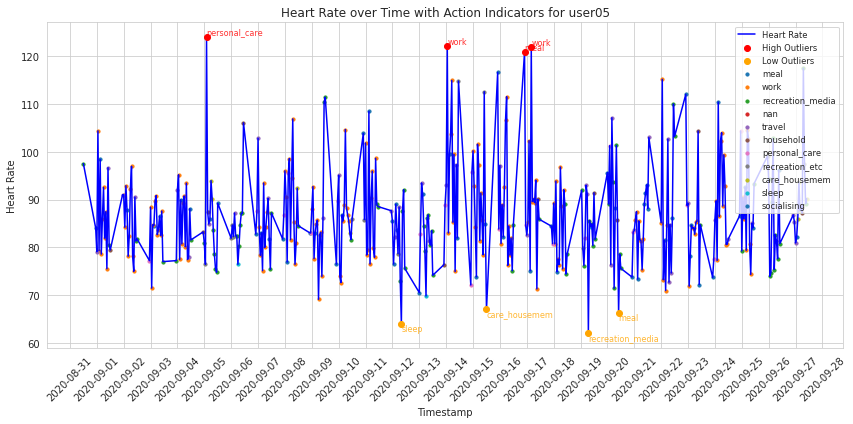

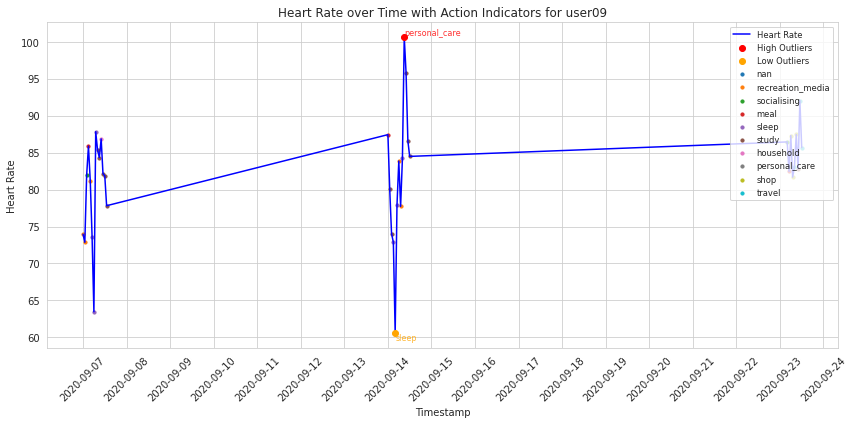

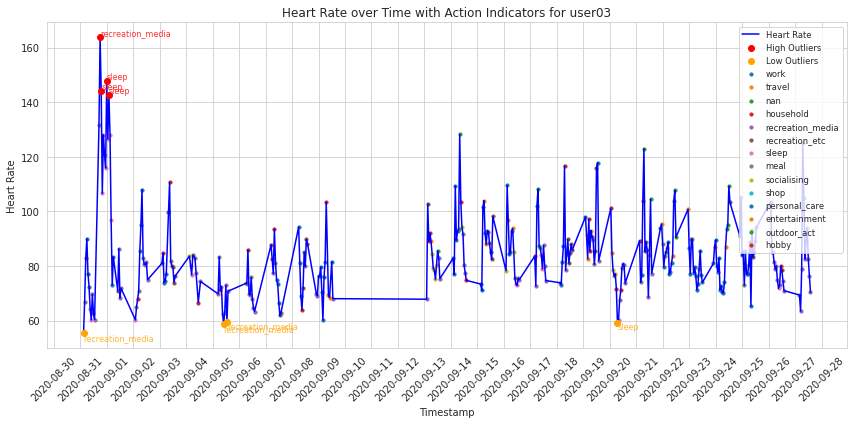

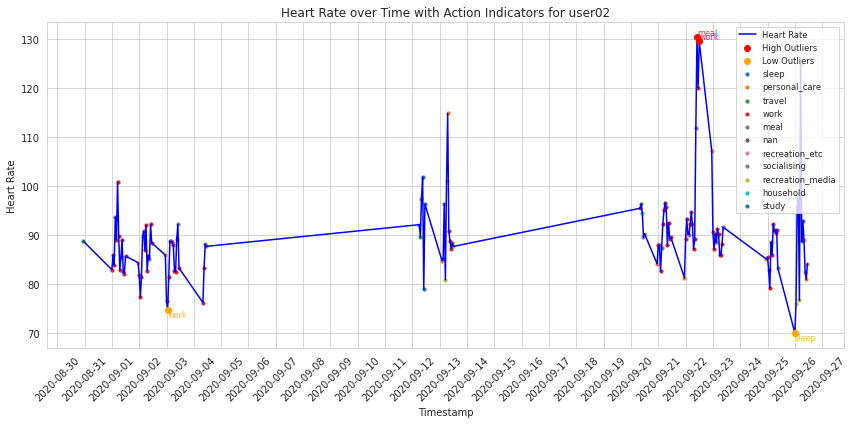

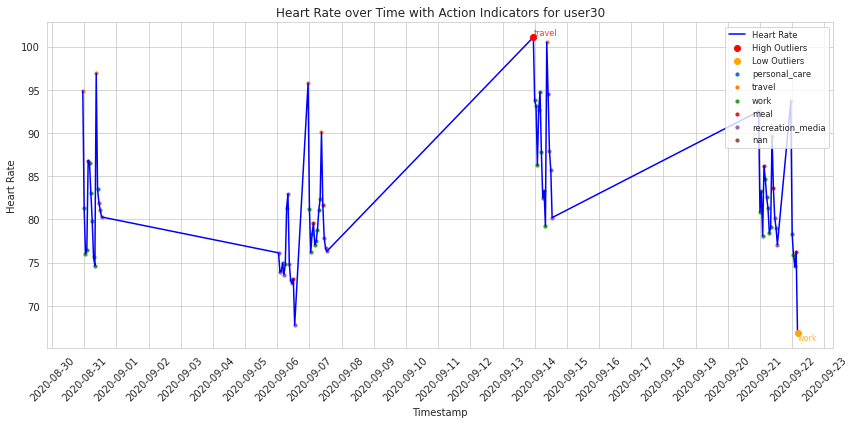

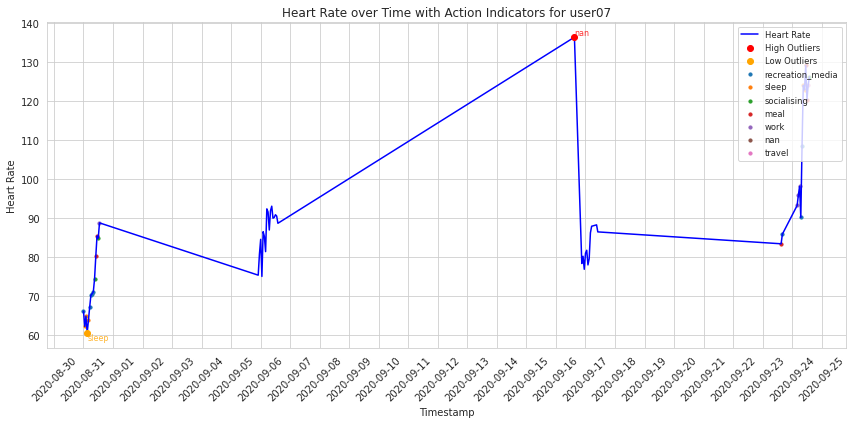

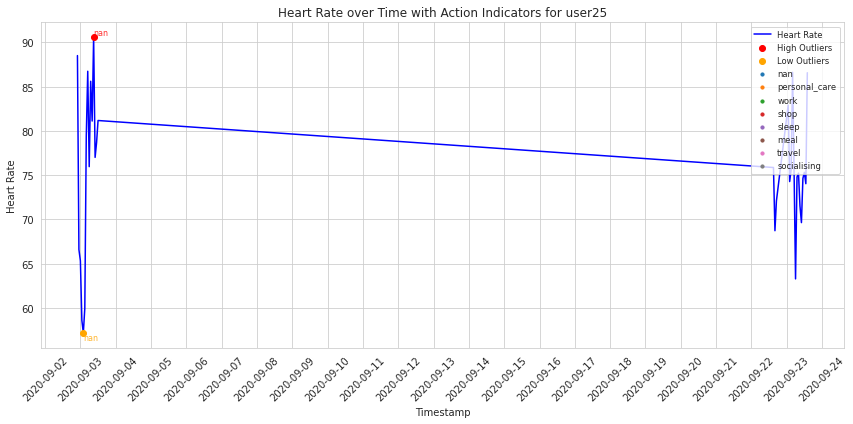

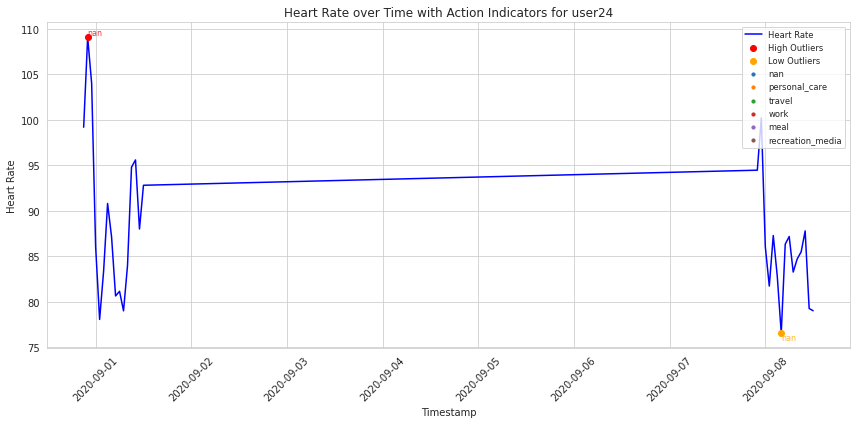

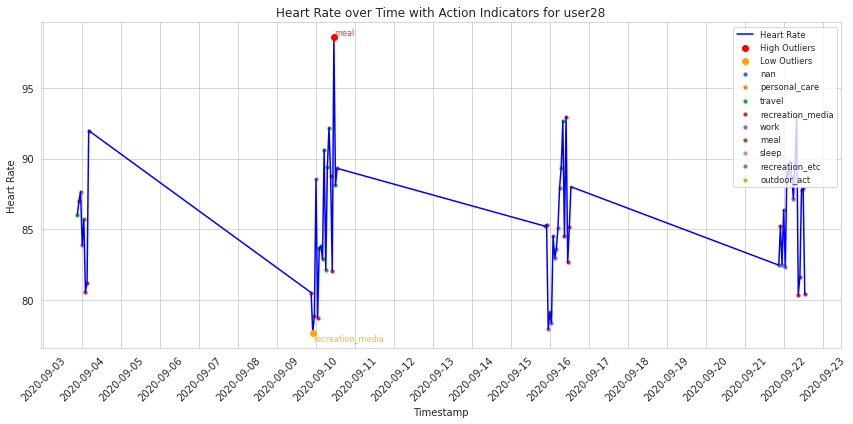

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DayLocator, DateFormatter

def hr_plot_and_outliers(df, output_dir_high, output_dir_low, outptu_dir_fig, fig_name, userid):
    # Check if 'hr' column exists in the dataframe
    if 'hr' not in df.columns:
        print(f"Skipping '{fig_name}' as 'hr' column does not exist in the dataframe.")
        return
    
    # Convert 'timestamp' column to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Set plot style
    sns.set_style("whitegrid")
    
    # Create a figure
    plt.figure(figsize=(12, 6))
    
    # Plot heart rate over time
    sns.lineplot(data=df, x='timestamp', y='hr', color='blue', label='Heart Rate')

    # Define thresholds for outliers
    high_threshold = df['hr'].quantile(0.99)
    low_threshold = df['hr'].quantile(0.01)

    # Identify high and low outliers
    outliers_high = df[df['hr'] > high_threshold]
    outliers_low = df[df['hr'] < low_threshold]

    # Mark outliers on the plot
    plt.scatter(outliers_high['timestamp'], outliers_high['hr'], color='red', label='High Outliers', zorder=5)
    plt.scatter(outliers_low['timestamp'], outliers_low['hr'], color='orange', label='Low Outliers', zorder=5)

    # Plot action indicators
    actions = df['action'].unique()
    for action in actions:
        subset = df[df['action'] == action]
        plt.scatter(subset['timestamp'], subset['hr'], label=action, s=10)  # Adjusted size for better visibility

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set x-axis ticks to display every day
    plt.gca().xaxis.set_major_locator(DayLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

    # Add legend for action indicators with a consistent location and adjusted font size
    plt.legend(fontsize='small', loc='upper right')

    # Add labels for outliers indicating their corresponding action
    for i, point in outliers_high.iterrows():
        plt.text(point['timestamp'], point['hr'], str(point['action']), fontsize=8, ha='left', va='bottom', color='red', alpha=0.8)
    for i, point in outliers_low.iterrows():
        plt.text(point['timestamp'], point['hr'], str(point['action']), fontsize=8, ha='left', va='top', color='orange', alpha=0.8)

    # Add labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Heart Rate')
    plt.title(f'Heart Rate over Time with Action Indicators for {userid}')

    # Adjust layout and save plot
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir_fig, fig_name))
    plt.show()

    # Save high outlier information
    outliers_high_info = outliers_high[['action', 'condition', 'place', 'emotionPositive', 'emotionTension', 'activity']]
    outliers_high_info.to_csv(os.path.join(output_dir_high, f"{userid}_hr_high_outliers.csv"), index=False)

    # Save low outlier information
    outliers_low_info = outliers_low[['action', 'condition', 'place', 'emotionPositive', 'emotionTension', 'activity']]
    outliers_low_info.to_csv(os.path.join(output_dir_low, f"{userid}_hr_low_outliers.csv"), index=False)

# Input and output paths
folder_path = './sensor_data'
output_path_high = './sensor_data/outlier_info/outlier_info_high'
output_path_low = './sensor_data/outlier_info/outlier_info_low'
output_dir_fig = './sensor_data/outlier_info'

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Process each CSV file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith("_label_merged.csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Extract user ID from filename
        userid = filename.split('_')[0]
        
        # Check if 'hr' column exists in the dataframe
        if 'hr' not in df.columns:
            print(f"Skipping '{filename}' as 'hr' column does not exist in the dataframe.")
            continue
        
        hr_plot_and_outliers(df, 
                            output_path_high,
                            output_path_low, 
                            output_dir_fig,
                            fig_name=f"{userid}_hr_plot.png",
                            userid=userid
        )


In [4]:
import os
os.getcwd()
os.chdir('./train_dataset')

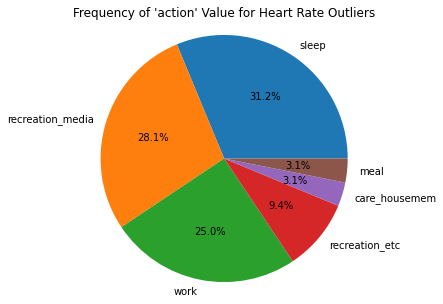

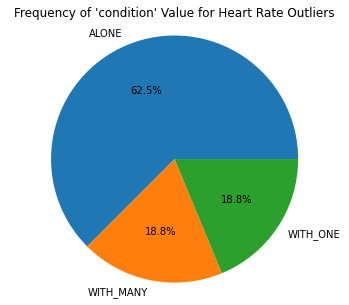

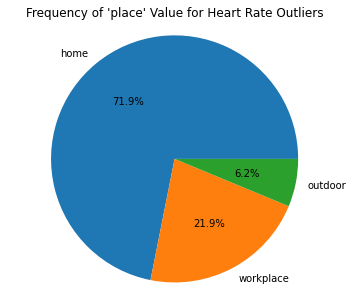

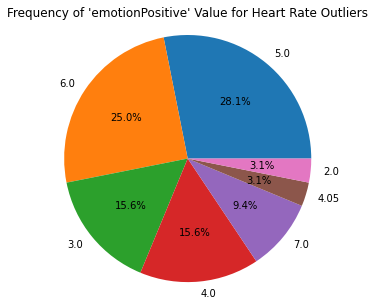

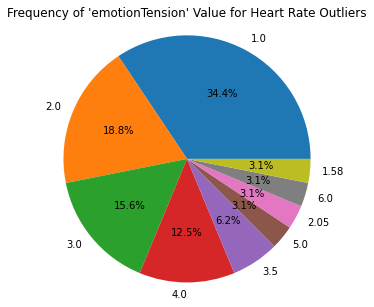

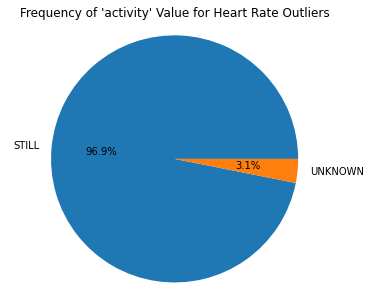

        Unique Value  Frequency
0              sleep         10
1   recreation_media          9
2               work          8
3     recreation_etc          3
4      care_housemem          1
5               meal          1
6              ALONE         20
7          WITH_MANY          6
8           WITH_ONE          6
9               home         23
10         workplace          7
11           outdoor          2
12               5.0          9
13               6.0          8
14               3.0          5
15               4.0          5
16               7.0          3
17              4.05          1
18               2.0          1
19               1.0         11
20               2.0          6
21               3.0          5
22               4.0          4
23               3.5          2
24               5.0          1
25              2.05          1
26               6.0          1
27              1.58          1
28             STILL         31
29           UNKNOWN          1


In [6]:
# concat all outlier information
import pandas as pd 
import os  
import matplotlib.pyplot as plt 

folder_path = './sensor_data/outlier_info/outlier_info_low'

combined_df = pd.DataFrame()
dfs= []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df], axis=0)

for column in combined_df.columns:
    # Count the frequency of each unique value in the column
    value_counts = combined_df[column].value_counts()
    
    # Sort the unique values based on their frequency in descending order
    sorted_values = value_counts.sort_values(ascending=False)
    
    if sorted_values.index.dtype == 'float64':
        sorted_values.index = sorted_values.index.round(2)
        
    # Create a DataFrame for the current column
    column_df = pd.DataFrame({'Unique Value': sorted_values.index,
                               'Frequency': sorted_values.values})
    
    # Append the DataFrame to the list
    dfs.append(column_df)
    
    # Plot a pie chart for the current column
    plt.figure(figsize=(6, 5))
    plt.pie(column_df['Frequency'], labels=column_df['Unique Value'], autopct='%1.1f%%')
    plt.title(f"Frequency of '{column}' Value for Heart Rate Outliers")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Concatenate all DataFrames in the list
results_df = pd.concat(dfs, ignore_index=True)

# Display the results DataFrame
print(results_df)